# Project Title
### Data Engineering Capstone Project

#### Project Summary
--describe your project at a high level--

The project follows the follow steps:
* Step 1: Scope the Project and Gather Data
* Step 2: Explore and Assess the Data
* Step 3: Define the Data Model
* Step 4: Run ETL to Model the Data
* Step 5: Complete Project Write Up

# Capstone Project on Data Engineering Udacity Nanadegree

In [1]:
import configparser
from datetime import datetime
from pyspark.sql import functions as F
import os
from datetime import timedelta
import pandas as pd
from pyspark.sql.functions import col,split,expr,udf,trim,mean,sum,create_map,explode,year
import time
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf, col
from pyspark.sql import types as T
from pyspark.sql.types import StructType,StructField,IntegerType,StringType,DoubleType,DateType,MapType
from pyspark.sql.functions import expr
from pyspark.sql.functions import year, month, dayofmonth, hour, weekofyear, date_format


In [4]:
# Do all imports and installs here
import pandas as pd
import configparser
from datetime import datetime
from pyspark.sql import functions as F
import os
import time
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf, col
from pyspark.sql import types as T
from pyspark.sql.functions import expr
from pyspark.sql.functions import year, month, dayofmonth, hour, weekofyear, date_format


### Step 1: Scope the Project and Gather Data


#### Scope

This project uses the four dataset provided by Udacity, which are 

- An immigration dataset of travellers arriving the United State of America by air, sea or road.
- An airport dataset of various airports in the United State with it's codes, names , type e.t.c
- A population demography dataset of various cities in the United State.
- A temperature dataset of daily temperature measured for various states.

From this datasets, key emphasis will be placed on the immigration dataset to build an analytical database for surveillance and monitoring of tourist validity period or stay in the United State, other analytical purposes can also be achieved . To provide such read-only database for analytics, various aws tools will be required, which are

- AWS S3 storage for datastorage.
- Apache spark for datalake processing (data cleaning and partitioning)
- AWS Redshift for data modelling and data warehouse

#### Describe and Gather Data  

##### The immigration dataset.


```
{"source":{"https://travel.trade.gov/outreachpages/inbound.general_information.inbound_overview.asp"},
"title":{"I-94 Visitor Arrivals Program"},
"description":{"I-94 monthly Arrival Data into USA"},
"attributes":{
    'cicid':"tourist identification number",
    'i94yr':"year of entry into the US",
    'i94mon':"month of entry into the US",
    'i94cit':"Country of citizen ",
    'i94res': "Country of residence",
    'i94port':"port of customs for arrival",
    'arrdate':"Date of arrival",
    'i94mode': " Mode of entry",
    'i94addr': "fisrt address in the US",
    'depdate': "departure date",
    'i94bir':"Age of respondent in years",
    'i94visa':"visa category",
    'count':"used for summary statistic",
    'dtadfile': "date record was added to I-94 files",
    'visapost':"Department of State where visa issued",
    'occup':"occupation while in the US",
    'entdepa':"Arrival flag, date admitted into US",
    'entdepd':"Departure flag",
    'entdepu':"update flag, either overstayed",
    'matflag':"match flag, match of arrival and departure",
    'biryear':"year of birth",
    'dtaddto':"date Admitted into the US",
    'gender' : "gender",
    'insnum' :"passport issuance number",
    'airline':"airline used to arrive in the US ",
    'admnum':"Admission number",
    'fltno':"fight number of tourist",
    'visatype':"class of admission"}
    
} 
```

##### The Airport codes dataset.

```
{"source":{"https://datahub.io/core/airport-codes"},
"title":{"Airport code for various countries airports"},
"description":{"The airport codes may refer to either IATA airport code, a three-letter code 
    which is used in passenger reservation, ticketing and baggage-handling systems, or the ICAO 
    airport code which is a four letter code used by ATC systems and for airports 
    that do not have an IATA airport code"},
"attributes":{
    'ident':"primary key for other interoperability with other datasets in OurAirport data,
            a text identifier for the airport",
    'type':"the size type of the airport",
    'name':"official airport name",
    'elevation_ft':"airport elevation in feet",
    'continent':"continent airport is located",
    'iso_country':" iso code of the country where airport is located",
    'iso_region': "iso code of the region where airport is located",
    'municipality': "primary municipality where the airport serves, not neccessarily 
                    where it is located",
    'gps_code': "the code that an aviation GPS database would normally use for the airport",
    'iata_code':"a three letter IATA code for the airport",
    'local_code': "local country code for the airport if different from gps_code and iata_code",
    'coordinates':"airport longitute and latitude in decimal degrees"
                     }}
```

##### The Population demography dataset.

```
{"source":{"https://public.opendatasoft.com/explore/?sort=modified&q=US+cities+demographics"},
"title":{"US city demographics"},
"description":{"Dataset contains information about the demographics of all US cities 
                and census-designated places with a population greater or equal to 65,000. "},
"attributes":{
    'City':"The City in focus",
    'State':"The State in focus",
    'Median Age':"Median age of the population", 
    'Male Population': "Number of male population", 
    'Female Population': "Number of female population", 
    'Total Population' : "Number of total population",  
    'Number of Veterans': "Number of veterans", 
    'Foreign-born': "Number of foreign-born", 
    'Average Household Size':"Average household size", 
    'State Code':"State code of the State in focus", 
    'Race': "The Race in focus", 
    'Count':""}
    
}
```

##### Temperature dataset.

```
{"source":{"https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data?select=GlobalLandTemperaturesByState.csv"},
"title":{"Earth surface temperature data},
"description":{"Global land temperature measurement by State"},
"attributes":{
    'dt':"date",
    'AverageTemperature':"average temperature recorded",
    'AverageTemperatureUncertainty': "average temperature uncertainty",
    'State':"State where temperature measurement was done ",
    'Country':"country where temperature measurement was done"
                   }}
```

### Step 2: Explore Datasets

#### Exploring the immigration dataset

In [3]:
# Read in the immigraton data with pandas and view schema
fname = "../../data/18-83510-I94-Data-2016/i94_apr16_sub.sas7bdat"
df = pd.read_sas(fname,'sas7bdat',encoding = "ISO-8859-1")

In [20]:
df.dtypes

cicid       float64
i94yr       float64
i94mon      float64
i94cit      float64
i94res      float64
i94port      object
arrdate     float64
i94mode     float64
i94addr      object
depdate     float64
i94bir      float64
i94visa     float64
count       float64
dtadfile     object
visapost     object
occup        object
entdepa      object
entdepd      object
entdepu      object
matflag      object
biryear     float64
dtaddto      object
gender       object
insnum       object
airline      object
admnum      float64
fltno        object
visatype     object
dtype: object

In [21]:
df.head(3)

,cicid,i94yr,i94mon,i94cit,i94res,i94port,arrdate,i94mode,i94addr,depdate,...,entdepu,matflag,biryear,dtaddto,gender,insnum,airline,admnum,fltno,visatype
0,6.0,2016.0,4.0,692.0,692.0,XXX,20573.0,NaN,NaN,NaN,...,U,NaN,1979.0,10282016,NaN,NaN,NaN,1.897628e+09,NaN,B2
1,7.0,2016.0,4.0,254.0,276.0,ATL,20551.0,1.0,AL,NaN,...,Y,NaN,1991.0,D/S,M,NaN,NaN,3.736796e+09,00296,F1
2,15.0,2016.0,4.0,101.0,101.0,WAS,20545.0,1.0,MI,20691.0,...,NaN,M,1961.0,09302016,M,NaN,OS,6.666432e+08,93,B2


In [16]:
# saving the data as csv file

df.to_csv('immigrationData.csv',sep=',',header =True,mode='w')


In [2]:
#reading aws access credentials

config = configparser.ConfigParser()
config.read_file(open(os.path.join(os.getcwd(),'dl.cfg')))

os.environ['AWS_ACCESS_KEY_ID'] = config['AWS']['AWS_ACCESS_KEY_ID']
os.environ['AWS_SECRET_ACCESS_KEY'] = config['AWS']['AWS_SECRET_ACCESS_KEY']


In [3]:
# instantiating a spark session

spark = SparkSession.builder\
        .config("spark.jars.packages","saurfang:spark-sas7bdat:2.0.0-s_2.11").enableHiveSupport().getOrCreate()



In [4]:
# providing the schema for reading in the data

paramSchema = StructType([StructField('cicid',DoubleType()),
                          StructField('i94yr',DoubleType()),
                          StructField('i94mon',DoubleType()),StructField('i94cit',DoubleType()),
                          StructField('i94res',DoubleType()),StructField('i94port',StringType()),
                          StructField('arrdate',DoubleType()),StructField('i94mode',DoubleType()),
                          StructField('i94addr',StringType()),StructField('depdate',DoubleType()),
                          StructField('i94bir',DoubleType()),StructField('i94visa',DoubleType()),
                          StructField('count',DoubleType()),StructField('dtadfile',StringType()),
                          StructField('visapost',StringType()),StructField('occup',StringType()),
                          StructField('entdepa',StringType()),StructField('entdepd',StringType()),
                          StructField('entdepu',StringType()),StructField('matflag',StringType()),
                          StructField('biryear',DoubleType()),StructField('dtaddto',StringType()),
                          StructField('gender',StringType()),StructField('insnum',StringType()),
                          StructField('airline',StringType()),StructField('admnum',DoubleType()),
                          StructField('fltno',StringType()),StructField('visatype',StringType())])


In [76]:
# reading in the data with spark

df_spark = spark.read.csv('immigrationData.csv',schema=paramSchema,header=True)
df_spark.count()

3096313

In [5]:
# reading in the data with spark

#df_spark = spark.read.format('com.github.saurfang.sas.spark').load('../../data/18-83510-I94-Data-2016/i94_apr16_sub.sas7bdat',schema=paramSchema)

In [6]:
# schema view

df_spark.printSchema()

root
 |-- cicid: double (nullable = true)
 |-- i94yr: double (nullable = true)
 |-- i94mon: double (nullable = true)
 |-- i94cit: double (nullable = true)
 |-- i94res: double (nullable = true)
 |-- i94port: string (nullable = true)
 |-- arrdate: double (nullable = true)
 |-- i94mode: double (nullable = true)
 |-- i94addr: string (nullable = true)
 |-- depdate: double (nullable = true)
 |-- i94bir: double (nullable = true)
 |-- i94visa: double (nullable = true)
 |-- count: double (nullable = true)
 |-- dtadfile: string (nullable = true)
 |-- visapost: string (nullable = true)
 |-- occup: string (nullable = true)
 |-- entdepa: string (nullable = true)
 |-- entdepd: string (nullable = true)
 |-- entdepu: string (nullable = true)
 |-- matflag: string (nullable = true)
 |-- biryear: double (nullable = true)
 |-- dtaddto: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- insnum: string (nullable = true)
 |-- airline: string (nullable = true)
 |-- admnum: double (nullable = 

In [7]:
pd.set_option('max_colwidth',300)
df_spark.limit(5).toPandas()

,cicid,i94yr,i94mon,i94cit,i94res,i94port,arrdate,i94mode,i94addr,depdate,...,entdepu,matflag,biryear,dtaddto,gender,insnum,airline,admnum,fltno,visatype
0,6.0,2016.0,4.0,692.0,692.0,XXX,20573.0,NaN,None,NaN,...,U,None,1979.0,10282016,None,None,None,1.897628e+09,None,B2
1,7.0,2016.0,4.0,254.0,276.0,ATL,20551.0,1.0,AL,NaN,...,Y,None,1991.0,D/S,M,None,None,3.736796e+09,00296,F1
2,15.0,2016.0,4.0,101.0,101.0,WAS,20545.0,1.0,MI,20691.0,...,None,M,1961.0,09302016,M,None,OS,6.666432e+08,93,B2
3,16.0,2016.0,4.0,101.0,101.0,NYC,20545.0,1.0,MA,20567.0,...,None,M,1988.0,09302016,None,None,AA,9.246846e+10,00199,B2
4,17.0,2016.0,4.0,101.0,101.0,NYC,20545.0,1.0,MA,20567.0,...,None,M,2012.0,09302016,None,None,AA,9.246846e+10,00199,B2


In [11]:
# number of rows

df_spark.count()

3096313

In [8]:
df_spark.show(truncate=False)

+-----+------+------+------+------+-------+-------+-------+-------+-------+------+-------+-----+--------+--------+-----+-------+-------+-------+-------+-------+--------+------+------+-------+--------------+-----+--------+
|cicid|i94yr |i94mon|i94cit|i94res|i94port|arrdate|i94mode|i94addr|depdate|i94bir|i94visa|count|dtadfile|visapost|occup|entdepa|entdepd|entdepu|matflag|biryear|dtaddto |gender|insnum|airline|admnum        |fltno|visatype|
+-----+------+------+------+------+-------+-------+-------+-------+-------+------+-------+-----+--------+--------+-----+-------+-------+-------+-------+-------+--------+------+------+-------+--------------+-----+--------+
|6.0  |2016.0|4.0   |692.0 |692.0 |XXX    |20573.0|null   |null   |null   |37.0  |2.0    |1.0  |null    |null    |null |T      |null   |U      |null   |1979.0 |10282016|null  |null  |null   |1.897628485E9 |null |B2      |
|7.0  |2016.0|4.0   |254.0 |276.0 |ATL    |20551.0|1.0    |AL     |null   |25.0  |3.0    |1.0  |20130811|SEO    

In [13]:
# counting the number of nan or null values for each column method 1

df_spark.select([F.count(F.when(F.isnan(c) | F.isnull(c), c)).alias(c) for c in df_spark.columns]).collect()

[Row(cicid=0, i94yr=0, i94mon=0, i94cit=0, i94res=0, i94port=0, arrdate=0, i94mode=239, i94addr=152592, depdate=142457, i94bir=802, i94visa=0, count=0, dtadfile=1, visapost=1881250, occup=3088187, entdepa=238, entdepd=138429, entdepu=3095921, matflag=138429, biryear=802, dtaddto=477, gender=414269, insnum=2982605, airline=83627, admnum=0, fltno=19549, visatype=0)]

In [14]:
# counting the number of nan or null values for each column method 2

null_df = {col:df_spark.filter(F.col(col).isNull()).count() for col in df_spark.columns}
null_df

{'cicid': 0,
 'i94yr': 0,
 'i94mon': 0,
 'i94cit': 0,
 'i94res': 0,
 'i94port': 0,
 'arrdate': 0,
 'i94mode': 239,
 'i94addr': 152592,
 'depdate': 142457,
 'i94bir': 802,
 'i94visa': 0,
 'count': 0,
 'dtadfile': 1,
 'visapost': 1881250,
 'occup': 3088187,
 'entdepa': 238,
 'entdepd': 138429,
 'entdepu': 3095921,
 'matflag': 138429,
 'biryear': 802,
 'dtaddto': 477,
 'gender': 414269,
 'insnum': 2982605,
 'airline': 83627,
 'admnum': 0,
 'fltno': 19549,
 'visatype': 0}

In [9]:
# filling the nan values with 0 in the numeric columns and Nil in the categorical columns (except the depdate 
# which is not filled to allow for reformating of timestamp). The numeric columns
# are also categorical values that can't be summed. this replacement will signify lack of record. 

df_spark = df_spark.na.fill({'i94mode':0,'i94addr':'Nil','i94bir':0,'dtadfile':'Nil','visapost':'Nil','occup':'Nil',
          'entdepa':'Nil','entdepd':'Nil','entdepu':'Nil','matflag':'Nil','biryear':0,'dtaddto':'Nil',
          'gender':'Nil','insnum':'Nil','airline':'Nil','fltno':'Nil'})

In [16]:
# reverifying the number of nan or null values for each column method 2

null_df = {col:df_spark.filter(F.col(col).isNull()).count() for col in df_spark.columns}
null_df

{'cicid': 0,
 'i94yr': 0,
 'i94mon': 0,
 'i94cit': 0,
 'i94res': 0,
 'i94port': 0,
 'arrdate': 0,
 'i94mode': 0,
 'i94addr': 0,
 'depdate': 142457,
 'i94bir': 0,
 'i94visa': 0,
 'count': 0,
 'dtadfile': 0,
 'visapost': 0,
 'occup': 0,
 'entdepa': 0,
 'entdepd': 0,
 'entdepu': 0,
 'matflag': 0,
 'biryear': 0,
 'dtaddto': 0,
 'gender': 0,
 'insnum': 0,
 'airline': 0,
 'admnum': 0,
 'fltno': 0,
 'visatype': 0}

In [10]:
# numrical code used for countris the dataset 

country_code ={582 :'MEXICO Air Sea, and Not Reported (I-94, no land arrivals)',236:'AFGHANISTAN',101:'ALBANIA',316:'ALGERIA',
102 :'ANDORRA',324:'ANGOLA',529:'ANGUILLA',518:'ANTIGUA-BARBUDA',687:'ARGENTINA',151:'ARMENIA',532:'ARUBA',
438:'AUSTRALIA',103:'AUSTRIA',152:'AZERBAIJAN',512:'BAHAMAS',298:'BAHRAIN',274:'BANGLADESH',513:'BARBADOS',
104:'BELGIUM',581:'BELIZE',386:'BENIN',509:'BERMUDA',153:'BELARUS',242:'BHUTAN',688:'BOLIVIA',717:'BONAIRE, ST EUSTATIUS, SABA', 
164:'BOSNIA-HERZEGOVINA',336:'BOTSWANA',689:'BRAZIL',525:'BRITISH VIRGIN ISLANDS',217:'BRUNEI',105:'BULGARIA',
393:'BURKINA FASO',243:'BURMA',375:'BURUNDI',310:'CAMEROON',326:'CAPE VERDE',526:'CAYMAN ISLANDS',383:'CENTRAL AFRICAN REPUBLIC',
384:'CHAD',690:'CHILE',245:'CHINA, PRC',721:'CURACAO',270:'CHRISTMAS ISLAND',271:'COCOS ISLANDS',691:'COLOMBIA',
317:'COMOROS',385:'CONGO',467:'COOK ISLANDS',575:'COSTA RICA',165:'CROATIA',584:'CUBA',218:'CYPRUS',
140:'CZECH REPUBLIC',723:'FAROE ISLANDS (PART OF DENMARK)',108:'DENMARK',322:'DJIBOUTI',519:'DOMINICA',
585:'DOMINICAN REPUBLIC',240:'EAST TIMOR',692:'ECUADOR',368:'EGYPT',576:'EL SALVADOR',399:'EQUATORIAL GUINEA',
372:'ERITREA',109:'ESTONIA',369:'ETHIOPIA',604:'FALKLAND ISLANDS',413:'FIJI',110:'FINLAND',111:'FRANCE',
601:'FRENCH GUIANA',411:'FRENCH POLYNESIA',387:'GABON',338:'GAMBIA',758:'GAZA STRIP', 154:'GEORGIA',
112:'GERMANY',339:'GHANA',143:'GIBRALTAR',113:'GREECE',520:'GRENADA',507:'GUADELOUPE',577:'GUATEMALA',382:'GUINEA',
327:'GUINEA-BISSAU',603:'GUYANA',586:'HAITI',726:'HEARD AND MCDONALD IS.',149:'HOLY SEE/VATICAN',528:'HONDURAS',
206:'HONG KONG',114:'HUNGARY',115:'ICELAND',213:'INDIA',759:'INDIAN OCEAN AREAS (FRENCH)',729:'INDIAN OCEAN TERRITORY', 
204:'INDONESIA',249:'IRAN',250:'IRAQ',116:'IRELAND',251:'ISRAEL',117:'ITALY',388:'IVORY COAST',514:'JAMAICA',
209:'JAPAN',253:'JORDAN',201:'KAMPUCHEA',155:'KAZAKHSTAN',340:'KENYA',414:'KIRIBATI',732:'KOSOVO',272:'KUWAIT',
156:'KYRGYZSTAN',203:'LAOS',118:'LATVIA',255:'LEBANON',335:'LESOTHO',370:'LIBERIA',381:'LIBYA',119:'LIECHTENSTEIN',
120:'LITHUANIA',121:'LUXEMBOURG',214:'MACAU',167:'MACEDONIA',320:'MADAGASCAR',345:'MALAWI',273:'MALAYSIA',
220:'MALDIVES',392:'MALI',145:'MALTA',472:'MARSHALL ISLANDS',511:'MARTINIQUE',389:'MAURITANIA',342:'MAURITIUS',
760:'MAYOTTE (AFRICA - FRENCH)',473:'MICRONESIA, FED. STATES OF',157:'MOLDOVA',122:'MONACO',299:'MONGOLIA',
735:'MONTENEGRO',521:'MONTSERRAT',332:'MOROCCO',329:'MOZAMBIQUE',371:'NAMIBIA',440:'NAURU',257:'NEPAL',
123:'NETHERLANDS',508:'NETHERLANDS ANTILLES',409:'NEW CALEDONIA',464:'NEW ZEALAND',579:'NICARAGUA',390:'NIGER',
343:'NIGERIA',470:'NIUE',275:'NORTH KOREA',124:'NORWAY',256:'OMAN',258:'PAKISTAN',474:'PALAU',743:'PALESTINE', 
504:'PANAMA',441:'PAPUA NEW GUINEA',693:'PARAGUAY',694:'PERU',260:'PHILIPPINES',416:'PITCAIRN ISLANDS',107:'POLAND',
126:'PORTUGAL',297:'QATAR',748:'REPUBLIC OF SOUTH SUDAN',321:'REUNION',127:'ROMANIA',158:'RUSSIA',
376:'RWANDA',128:'SAN MARINO',330:'SAO TOME AND PRINCIPE',261:'SAUDI ARABIA',391:'SENEGAL',
142:'SERBIA AND MONTENEGRO',745:'SERBIA',347:'SEYCHELLES',348:'SIERRA LEONE',207:'SINGAPORE',141:'SLOVAKIA',
166:'SLOVENIA',412:'SOLOMON ISLANDS',397:'SOMALIA',373:'SOUTH AFRICA',276:'SOUTH KOREA',129:'SPAIN',
244:'SRI LANKA',346:'ST. HELENA',522:'ST. KITTS-NEVIS',523:'ST. LUCIA',502:'ST. PIERRE AND MIQUELON',
524:'ST. VINCENT-GRENADINES',716:'SAINT BARTHELEMY',736:'SAINT MARTIN',749:'SAINT MAARTEN',350:'SUDAN',
602:'SURINAME',351:'SWAZILAND',130:'SWEDEN',131:'SWITZERLAND',262:'SYRIA',268:'TAIWAN',159:'TAJIKISTAN',
353:'TANZANIA',263:'THAILAND',304:'TOGO',417:'TONGA',516:'TRINIDAD AND TOBAGO',323:'TUNISIA',264:'TURKEY',
161:'TURKMENISTAN',527:'TURKS AND CAICOS ISLANDS',420:'TUVALU',352:'UGANDA',162 :'UKRAINE',
296:'UNITED ARAB EMIRATES',135:'UNITED KINGDOM',695:'URUGUAY',163:'UZBEKISTAN',410:'VANUATU',
696:'VENEZUELA',266:'VIETNAM',469:'WALLIS AND FUTUNA ISLANDS',757:'WEST INDIES (FRENCH)',333:'WESTERN SAHARA',
465:'WESTERN SAMOA',216:'YEMEN',139:'YUGOSLAVIA',301:'ZAIRE',344:'ZAMBIA',315:'ZIMBABWE',
403:'INVALID: AMERICAN SAMOA',712:'INVALID: ANTARCTICA' ,700:'INVALID: BORN ON BOARD SHIP',
719:'INVALID: BOUVET ISLAND (ANTARCTICA/NORWAY TERR.)',574:'INVALID: CANADA',
720:'INVALID: CANTON AND ENDERBURY ISLS',106:'INVALID: CZECHOSLOVAKIA',
739:'INVALID: DRONNING MAUD LAND (ANTARCTICA-NORWAY)',394:'INVALID: FRENCH SOUTHERN AND ANTARCTIC',
501:'INVALID: GREENLAND',404:'INVALID: GUAM',730:'INVALID: INTERNATIONAL WATERS',731:'INVALID: JOHNSON ISLAND', 
471:'INVALID: MARIANA ISLANDS, NORTHERN',737:'INVALID: MIDWAY ISLANDS',753:'INVALID: MINOR OUTLYING ISLANDS - USA',
740:'INVALID: NEUTRAL ZONE (S. ARABIA/IRAQ)',710:'INVALID: NON-QUOTA IMMIGRANT',505:'INVALID: PUERTO RICO',
0:'INVALID: STATELESS',705:'INVALID: STATELESS',583:'INVALID: UNITED STATES',407:'INVALID: UNITED STATES',
999:'INVALID: UNKNOWN',239:'INVALID: UNKNOWN COUNTRY',134:'INVALID: USSR',506:'INVALID: U.S. VIRGIN ISLANDS',
755:'INVALID: WAKE ISLAND',311:'Collapsed Tanzania (should not show)',741:'Collapsed Curacao (should not show)',
54:'No Country Code (54)',100:'No Country Code (100)',187:'No Country Code (187)',190:'No Country Code (190)',
200:'No Country Code (200)',219:'No Country Code (219)',238:'No Country Code (238)',277:'No Country Code (277)',
293:'No Country Code (293)',300:'No Country Code (300)',319:'No Country Code (319)',365:'No Country Code (365)',
395:'No Country Code (395)',400:'No Country Code (400)',485:'No Country Code (485)',503:'No Country Code (503)',
589:'No Country Code (589)',592:'No Country Code (592)',791:'No Country Code (791)',849:'No Country Code (849)',
914:'No Country Code (914)',944:'No Country Code (944)',996:'No Country Code (996)',125.0:"No record",
133.0:"No record",147.0:"No record",148.0:"No record",180.0:"No record",247.0:"No record",248.0:"No record",
252.0:"No record",254.0:"No record",267.0:"No record",374.0:"No record",406.0:"No record",578.0:"No record",
580.0:"No record",714.0:"No record",718.0:"No record",727.0:"No record",728.0:"No record",733.0:"No record",
734.0:"No record",746.0:"No record",751.0:"No record",752.0:"No record",756.0:"No record",763.0:"No record",
764.0:"No record",765.0:"No record",766.0:"No record",769.0:"No record",770.0:"No record"}

In [11]:
# categorical code used for port of entry in the dataset

port_of_entry_code = {'ALC':'ALCAN, AK','ANC':'ANCHORAGE, AK','BAR':'BAKER AAF - BAKER ISLAND, AK',
'DAC':'DALTONS CACHE, AK','PIZ':'DEW STATION PT LAY DEW, AK','DTH':'DUTCH HARBOR, AK','EGL':'EAGLE, AK',
'FRB':'FAIRBANKS, AK','HOM':'HOMER, AK','HYD':'HYDER, AK','JUN':'JUNEAU, AK','5KE':'KETCHIKAN, AK',
'KET':'KETCHIKAN, AK','MOS':'MOSES POINT INTERMEDIATE, AK','NIK':'NIKISKI, AK','NOM':'NOM, AK',
'PKC':'POKER CREEK, AK','ORI':'PORT LIONS SPB, AK','SKA':'SKAGWAY, AK','SNP':'ST. PAUL ISLAND, AK',
'TKI':'TOKEEN, AK','WRA':'WRANGELL, AK','HSV':'MADISON COUNTY - HUNTSVILLE, AL','MOB':'MOBILE, AL',
'LIA':'LITTLE ROCK, AR (BPS)','ROG':'ROGERS ARPT, AR','DOU':'DOUGLAS, AZ','LUK':'LUKEVILLE, AZ',
'MAP':'MARIPOSA AZ','NAC':'NACO, AZ','NOG':'NOGALES, AZ','PHO':'PHOENIX, AZ','POR':'PORTAL, AZ',
'SLU':'SAN LUIS, AZ','SAS':'SASABE, AZ','TUC':'TUCSON, AZ','YUI':'YUMA, AZ' ,'AND':'ANDRADE, CA',
'BUR':'BURBANK, CA','CAL':'CALEXICO, CA','CAO':'CAMPO, CA','FRE':'FRESNO, CA','ICP':'IMPERIAL COUNTY, CA',
'LNB':'LONG BEACH, CA','LOS':'LOS ANGELES, CA','BFL':'MEADOWS FIELD - BAKERSFIELD, CA','OAK':'OAKLAND, CA', 
'ONT':'ONTARIO, CA','OTM':'OTAY MESA, CA','BLT':'PACIFIC, HWY. STATION, CA','PSP':'PALM SPRINGS, CA',
'SAC':'SACRAMENTO, CA','SLS':'SALINAS, CA (BPS)','SDP':'SAN DIEGO, CA','SFR':'SAN FRANCISCO, CA',
'SNJ':'SAN JOSE, CA','SLO':'SAN LUIS OBISPO, CA','SLI':'SAN LUIS OBISPO, CA (BPS)','SPC':'SAN PEDRO, CA',
'SYS':'SAN YSIDRO, CA','SAA':'SANTA ANA, CA','STO':'STOCKTON, CA (BPS)','TEC':'TECATE, CA',
'TRV':'TRAVIS-AFB, CA','APA':'ARAPAHOE COUNTY, CO','ASE':'ASPEN, CO #ARPT','COS':'COLORADO SPRINGS, CO',
'DEN':'DENVER, CO','DRO':'LA PLATA - DURANGO, CO','BDL':'BRADLEY INTERNATIONAL, CT','BGC':'BRIDGEPORT, CT',
'GRT':'GROTON, CT','HAR':'HARTFORD, CT','NWH':'NEW HAVEN, CT','NWL':'NEW LONDON, CT',
'TST':'NEWINGTON DATA CENTER TEST, CT','WAS':'WASHINGTON DC','DOV':'DOVER AFB, DE','DVD':'DOVER-AFB, DE',
'WLL':'WILMINGTON, DE','BOC':'BOCAGRANDE, FL','SRQ':'BRADENTON - SARASOTA, FL','CAN':'CAPE CANAVERAL, FL',
'DAB':'DAYTONA BEACH INTERNATIONAL, FL','FRN':'FERNANDINA, FL','FTL':'FORT LAUDERDALE, FL',
'FMY':'FORT MYERS, FL','FPF':'FORT PIERCE, FL','HUR':'HURLBURT FIELD, FL',
'GNV':'J R ALISON MUNI - GAINESVILLE, FL','JAC':'JACKSONVILLE, FL','KEY':'KEY WEST, FL',
'LEE':'LEESBURG MUNICIPAL AIRPORT, FL','MLB':'MELBOURNE, FL','MIA':'MIAMI, FL','APF':'NAPLES, FL #ARPT',
'OPF':'OPA LOCKA, FL','ORL':'ORLANDO, FL','PAN':'PANAMA CITY, FL','PEN':'PENSACOLA, FL',
'PCF':'PORT CANAVERAL, FL','PEV':'PORT EVERGLADES, FL','PSJ':'PORT ST JOE, FL','SFB':'SANFORD, FL',
'SGJ':'ST AUGUSTINE ARPT, FL','SAU':'ST AUGUSTINE, FL','FPR':'ST LUCIE COUNTY, FL','SPE':'ST PETERSBURG, FL',
'TAM':'TAMPA, FL','WPB':'WEST PALM BEACH, FL','ATL':'ATLANTA, GA','BRU':'BRUNSWICK, GA',
'AGS':'BUSH FIELD - AUGUSTA, GA','SAV':'SAVANNAH, GA','AGA':'AGANA, GU','HHW':'HONOLULU, HI',
'OGG':'KAHULUI - MAUI, HI','KOA':'KEAHOLE-KONA, HI','LIH':'LIHUE, HI','CID':'CEDAR RAPIDS/IOWA CITY, IA',
'DSM':'DES MOINES, IA','BOI':'AIR TERM. (GOWEN FLD) BOISE, ID','EPI':'EASTPORT, ID',
'IDA':'FANNING FIELD - IDAHO FALLS, ID','PTL':'PORTHILL, ID','SPI':'CAPITAL - SPRINGFIELD, IL','CHI':'CHICAGO, IL',
'DPA':'DUPAGE COUNTY, IL','PIA':'GREATER PEORIA, IL','RFD':'GREATER ROCKFORD, IL',
'UGN':'MEMORIAL - WAUKEGAN, IL','GAR':'GARY, IN','HMM':'HAMMOND, IN','INP':'INDIANAPOLIS, IN',
'MRL':'MERRILLVILLE, IN','SBN':'SOUTH BEND, IN','ICT':'MID-CONTINENT - WITCHITA, KS',
'LEX':'BLUE GRASS - LEXINGTON, KY','LOU':'LOUISVILLE, KY','BTN':'BATON ROUGE, LA','LKC':'LAKE CHARLES, LA',
'LAK':'LAKE CHARLES, LA (BPS)','MLU':'MONROE, LA','MGC':'MORGAN CITY, LA','NOL':'NEW ORLEANS, LA',
'BOS':'BOSTON, MA','GLO':'GLOUCESTER, MA','BED':'HANSCOM FIELD - BEDFORD, MA','LYN':'LYNDEN, WA',
'ADW':'ANDREWS AFB, MD','BAL':'BALTIMORE, MD','MKG':'MUSKEGON, MD','PAX':'PATUXENT RIVER, MD',
'BGM':'BANGOR, ME','BOO':'BOOTHBAY HARBOR, ME','BWM':'BRIDGEWATER, ME','BCK':'BUCKPORT, ME','CLS':'CALAIS, ME',
'CRB':'CARIBOU, ME','COB':'COBURN GORE, ME','EST':'EASTCOURT, ME','EPT':'EASTPORT MUNICIPAL, ME',
'EPM':'EASTPORT, ME','FOR':'FOREST CITY, ME','FTF':'FORT FAIRFIELD, ME','FTK':'FORT KENT, ME','HML':'HAMIIN, ME',
'HTM':'HOULTON, ME','JKM':'JACKMAN, ME','KAL':'KALISPEL, MT','LIM':'LIMESTONE, ME','LUB':'LUBEC, ME',
'MAD':'MADAWASKA, ME','POM':'PORTLAND, ME','RGM':'RANGELEY, ME (BPS)','SBR':'SOUTH BREWER, ME',
'SRL':'ST AURELIE, ME','SPA':'ST PAMPILE, ME','VNB':'VAN BUREN, ME','VCB':'VANCEBORO, ME','AGN':'ALGONAC, MI',
'ALP':'ALPENA, MI','BCY':'BAY CITY, MI','DET':'DETROIT, MI','GRP':'GRAND RAPIDS, MI','GRO':'GROSSE ISLE, MI',
'ISL':'ISLE ROYALE, MI','MRC':'MARINE CITY, MI','MRY':'MARYSVILLE, MI','PTK':'OAKLAND COUNTY - PONTIAC, MI',
'PHU':'PORT HURON, MI','RBT':'ROBERTS LANDING, MI','SAG':'SAGINAW, MI','SSM':'SAULT STE. MARIE, MI',
'SCL':'ST CLAIR, MI','YIP':'WILLOW RUN - YPSILANTI, MI','BAU':'BAUDETTE, MN','CAR':'CARIBOU MUNICIPAL AIRPORT, MN',
'GTF':'Collapsed into INT, MN','INL':'Collapsed into INT, MN','CRA':'CRANE LAKE, MN',
'MIC':'CRYSTAL MUNICIPAL AIRPORT, MN','DUL':'DULUTH, MN','ELY':'ELY, MN','GPM':'GRAND PORTAGE, MN',
'SVC':'GRANT COUNTY - SILVER CITY, MN','INT':"INT'L FALLS, MN",'LAN':'LANCASTER, MN','MSP':'MINN./ST PAUL, MN',
'LIN':'NORTHERN SVC CENTER, MN','NOY':'NOYES, MN','PIN':'PINE CREEK, MN','48Y':'PINECREEK BORDER ARPT, MN',
'RAN':'RAINER, MN','RST':'ROCHESTER, MN','ROS':'ROSEAU, MN','SPM':'ST PAUL, MN','WSB':'WARROAD INTL, SPB, MN',
'WAR':'WARROAD, MN','KAN':'KANSAS CITY, MO','SGF':'SPRINGFIELD-BRANSON, MO','STL':'ST LOUIS, MO',
'WHI':'WHITETAIL, MT','WHM':'WILD HORSE, MT','GPT':'BILOXI REGIONAL, MS','GTR':'GOLDEN TRIANGLE LOWNDES CNTY, MS',
'GUL':'GULFPORT, MS','PAS':'PASCAGOULA, MS','JAN':'THOMPSON FIELD - JACKSON, MS','BIL':'BILLINGS, MT',
'BTM':'BUTTE, MT','CHF':'CHIEF MT, MT','CTB':'CUT BANK MUNICIPAL, MT','CUT':'CUT BANK, MT',
'DLB':'DEL BONITA, MT','EUR':'EUREKA, MT (BPS)','BZN':'GALLATIN FIELD - BOZEMAN, MT',
'FCA':'GLACIER NATIONAL PARK, MT','GGW':'GLASGOW, MT','GRE':'GREAT FALLS, MT','HVR':'HAVRE, MT',
'HEL':'HELENA, MT','LWT':'LEWISTON, MT','MGM':'MORGAN, MT','OPH':'OPHEIM, MT','PIE':'PIEGAN, MT',
'RAY':'RAYMOND, MT','ROO':'ROOSVILLE, MT','SCO':'SCOBEY, MT','SWE':'SWEETGTASS, MT','TRL':'TRIAL CREEK, MT',
'TUR':'TURNER, MT','WCM':'WILLOW CREEK, MT','CLT':'CHARLOTTE, NC','FAY':'FAYETTEVILLE, NC',
'MRH':'MOREHEAD CITY, NC','FOP':'MORRIS FIELDS AAF, NC','GSO':'PIEDMONT TRIAD INTL AIRPORT, NC',
'RDU':'RALEIGH/DURHAM, NC','SSC':'SHAW AFB - SUMTER, NC','WIL':'WILMINGTON, NC','AMB':'AMBROSE, ND',
'ANT':'ANTLER, ND','CRY':'CARBURY, ND','DNS':'DUNSEITH, ND','FAR':'FARGO, ND','FRT':'FORTUNA, ND',
'GRF':'GRAND FORKS, ND','HNN':'HANNAH, ND','HNS':'HANSBORO, ND','MAI':'MAIDA, ND','MND':'MINOT, ND',
'NEC':'NECHE, ND','NOO':'NOONAN, ND','NRG':'NORTHGATE, ND','PEM':'PEMBINA, ND','SAR':'SARLES, ND',
'SHR':'SHERWOOD, ND','SJO':'ST JOHN, ND','WAL':'WALHALLA, ND','WHO':'WESTHOPE, ND','WND':'WILLISTON, ND',
'OMA':'OMAHA, NE','LEB':'LEBANON, NH','MHT':'MANCHESTER, NH','PNH':'PITTSBURG, NH','PSM':'PORTSMOUTH, NH',
'BYO':'BAYONNE, NJ','CNJ':'CAMDEN, NJ','HOB':'HOBOKEN, NJ','JER':'JERSEY CITY, NJ',
'WRI':'MC GUIRE AFB - WRIGHTSOWN, NJ','MMU':'MORRISTOWN, NJ','NEW':'NEWARK/TETERBORO, NJ',
'PER':'PERTH AMBOY, NJ','ACY':'POMONA FIELD - ATLANTIC CITY, NJ','ALA':'ALAMAGORDO, NM (BPS)',
'ABQ':'ALBUQUERQUE, NM','ANP':'ANTELOPE WELLS, NM','CRL':'CARLSBAD, NM','COL':'COLUMBUS, NM',
'CDD':'CRANE LAKE - ST. LOUIS CNTY, NM','DNM':'DEMING, NM (BPS)','LAS':'LAS CRUCES, NM',
'LOB':'LORDSBURG, NM (BPS)','RUI':'RUIDOSO, NM','STR':'SANTA TERESA, NM','RNO':'CANNON INTL - RENO/TAHOE, NV',
'FLX':'FALLON MUNICIPAL AIRPORT, NV','LVG':'LAS VEGAS, NV','REN':'RENO, NV','ALB':'ALBANY, NY',
'AXB':'ALEXANDRIA BAY, NY','BUF':'BUFFALO, NY','CNH':'CANNON CORNERS, NY','CAP':'CAPE VINCENT, NY',
'CHM':'CHAMPLAIN, NY','CHT':'CHATEAUGAY, NY','CLA':'CLAYTON, NY','FTC':'FORT COVINGTON, NY',
'LAG':'LA GUARDIA, NY','LEW':'LEWISTON, NY','MAS':'MASSENA, NY','MAG':'MCGUIRE AFB, NY','MOO':'MOORES, NY',
'MRR':'MORRISTOWN, NY','NYC':'NEW YORK, NY','NIA':'NIAGARA FALLS, NY','OGD':'OGDENSBURG, NY',
'OSW':'OSWEGO, NY','ELM':'REGIONAL ARPT - HORSEHEAD, NY','ROC':'ROCHESTER, NY','ROU':'ROUSES POINT, NY',
'SWF':'STEWART - ORANGE CNTY, NY','SYR':'SYRACUSE, NY','THO':'THOUSAND ISLAND BRIDGE, NY',
'TRO':'TROUT RIVER, NY','WAT':'WATERTOWN, NY','HPN':'WESTCHESTER - WHITE PLAINS, NY','WRB':'WHIRLPOOL BRIDGE, NY',
'YOU':'YOUNGSTOWN, NY','AKR':'AKRON, OH','ATB':'ASHTABULA, OH','CIN':'CINCINNATI, OH','CLE':'CLEVELAND, OH',
'CLM':'COLUMBUS, OH','LOR':'LORAIN, OH','MBO':'MARBLE HEADS, OH','SDY':'SANDUSKY, OH','TOL':'TOLEDO, OH',
'OKC':'OKLAHOMA CITY, OK','TUL':'TULSA, OK','AST':'ASTORIA, OR','COO':'COOS BAY, OR','HIO':'HILLSBORO, OR',
'MED':'MEDFORD, OR','NPT':'NEWPORT, OR','POO':'PORTLAND, OR','PUT':'PUT-IN-BAY, OH',
'RDM':'ROBERTS FIELDS - REDMOND, OR','ERI':'ERIE, PA','MDT':'HARRISBURG, PA','HSB':'HARRISONBURG, PA',
'PHI':'PHILADELPHIA, PA','PIT':'PITTSBURG, PA','AGU':'AGUADILLA, PR','BQN':'BORINQUEN - AGUADILLO, PR',
'JCP':'CULEBRA - BENJAMIN RIVERA, PR','ENS':'ENSENADA, PR','FAJ':'FAJARDO, PR','HUM':'HUMACAO, PR',
'JOB':'JOBOS, PR','MAY':'MAYAGUEZ, PR','PON':'PONCE, PR','PSE':'PONCE-MERCEDITA, PR','SAJ':'SAN JUAN, PR',
'VQS':'VIEQUES-ARPT, PR','PRO':'PROVIDENCE, RI','PVD':'THEODORE FRANCIS - WARWICK, RI','CHL':'CHARLESTON, SC',
'CAE':'COLUMBIA, SC #ARPT','GEO':'GEORGETOWN, SC','GSP':'GREENVILLE, SC','GRR':'GREER, SC','MYR':'MYRTLE BEACH, SC',
'SPF':'BLACK HILLS, SPEARFISH, SD','HON':'HOWES REGIONAL ARPT - HURON, SD','SAI':'SAIPAN, SPN',
'TYS':'MC GHEE TYSON - ALCOA, TN','MEM':'MEMPHIS, TN','NSV':'NASHVILLE, TN','TRI':'TRI CITY ARPT, TN',
'ADS':'ADDISON AIRPORT- ADDISON, TX','ADT':'AMISTAD DAM, TX','ANZ':'ANZALDUAS, TX','AUS':'AUSTIN, TX',
'BEA':'BEAUMONT, TX','BBP':'BIG BEND PARK, TX (BPS)','SCC':'BP SPEC COORD. CTR, TX','BTC':'BP TACTICAL UNIT, TX',
'BOA':'BRIDGE OF AMERICAS, TX','BRO':'BROWNSVILLE, TX','CRP':'CORPUS CHRISTI, TX','DAL':'DALLAS, TX',
'DLR':'DEL RIO, TX','DNA':'DONNA, TX','EGP':'EAGLE PASS, TX','ELP':'EL PASO, TX','FAB':'FABENS, TX',
'FAL':'FALCON HEIGHTS, TX','FTH':'FORT HANCOCK, TX','AFW':'FORT WORTH ALLIANCE, TX','FPT':'FREEPORT, TX',
'GAL':'GALVESTON, TX','HLG':'HARLINGEN, TX','HID':'HIDALGO, TX','HOU':'HOUSTON, TX',
'SGR':'HULL FIELD, SUGAR LAND ARPT, TX','LLB':'JUAREZ-LINCOLN BRIDGE, TX','LCB':'LAREDO COLUMBIA BRIDGE, TX',
'LRN':'LAREDO NORTH, TX','LAR':'LAREDO, TX','LSE':'LOS EBANOS, TX','IND':'LOS INDIOS, TX',
'LOI':'LOS INDIOS, TX','MRS':'MARFA, TX (BPS)','MCA':'MCALLEN, TX','MAF':'ODESSA REGIONAL, TX',
'PDN':'PASO DEL NORTE,TX','PBB':'PEACE BRIDGE, NY','PHR':'PHARR, TX','PAR':'PORT ARTHUR, TX',
'ISB':'PORT ISABEL, TX','POE':'PORT OF EL PASO, TX','PRE':'PRESIDIO, TX','PGR':'PROGRESO, TX',
'RIO':'RIO GRANDE CITY, TX','ROM':'ROMA, TX','SNA':'SAN ANTONIO, TX','SNN':'SANDERSON, TX',
'VIB':'VETERAN INTL BRIDGE, TX','YSL':'YSLETA, TX','CHA':'CHARLOTTE AMALIE, VI','CHR':'CHRISTIANSTED, VI',
'CRU':'CRUZ BAY, ST JOHN, VI','FRK':'FREDERIKSTED, VI','STT':'ST THOMAS, VI','LGU':'CACHE AIRPORT - LOGAN, UT',
'SLC':'SALT LAKE CITY, UT','CHO':'ALBEMARLE CHARLOTTESVILLE, VA','DAA':'DAVISON AAF - FAIRFAX CNTY, VA',
'HOP':'HOPEWELL, VA','HEF':'MANASSAS, VA #ARPT','NWN':'NEWPORT, VA','NOR':'NORFOLK, VA',
'RCM':'RICHMOND, VA','ABS':'ALBURG SPRINGS, VT','ABG':'ALBURG, VT','BEB':'BEEBE PLAIN, VT',
'BEE':'BEECHER FALLS, VT','BRG':'BURLINGTON, VT','CNA':'CANAAN, VT','DER':'DERBY LINE, VT (I-91)',
'DLV':'DERBY LINE, VT (RT. 5)','ERC':'EAST RICHFORD, VT','HIG':'HIGHGATE SPRINGS, VT',
'MOR':'MORSES LINE, VT','NPV':'NEWPORT, VT','NRT':'NORTH TROY, VT','NRN':'NORTON, VT',
'PIV':'PINNACLE ROAD, VT','RIF':'RICHFORT, VT','STA':'ST ALBANS, VT','SWB':'SWANTON, VT (BP - SECTOR HQ)',
'WBE':'WEST BERKSHIRE, VT','ABE':'ABERDEEN, WA','ANA':'ANACORTES, WA','BEL':'BELLINGHAM, WA',
'BLI':'BELLINGHAM, WASHINGTON #INTL','BLA':'BLAINE, WA','BWA':'BOUNDARY, WA','CUR':'CURLEW, WA (BPS)',
'DVL':'DANVILLE, WA','EVE':'EVERETT, WA','FER':'FERRY, WA','FRI':'FRIDAY HARBOR, WA','FWA':'FRONTIER, WA',
'KLM':'KALAMA, WA','LAU':'LAURIER, WA','LON':'LONGVIEW, WA','MET':'METALINE FALLS, WA',
'MWH':'MOSES LAKE GRANT COUNTY ARPT, WA','NEA':'NEAH BAY, WA','NIG':'NIGHTHAWK, WA','OLY':'OLYMPIA, WA',
'ORO':'OROVILLE, WA','PWB':'PASCO, WA','PIR':'POINT ROBERTS, WA','PNG':'PORT ANGELES, WA',
'PTO':'PORT TOWNSEND, WA','SEA':'SEATTLE, WA','SPO':'SPOKANE, WA','SUM':'SUMAS, WA','TAC':'TACOMA, WA',
'PSC':'TRI-CITIES - PASCO, WA','VAN':'VANCOUVER, WA','AGM':'ALGOMA, WI','BAY':'BAYFIELD, WI',
'GRB':'GREEN BAY, WI','MNW':'MANITOWOC, WI','MIL':'MILWAUKEE, WI','MSN':'TRUAX FIELD - DANE COUNTY, WI',
'CHS':'CHARLESTON, WV','CLK':'CLARKSBURG, WV','BLF':'MERCER COUNTY, WV','CSP':'CASPER, WY',
'XXX':'NOT REPORTED/UNKNOWN','888':'UNIDENTIFED AIR / SEAPORT','UNK':'UNKNOWN POE','CLG':'CALGARY, CANADA',
'EDA':'EDMONTON, CANADA','YHC':'HAKAI PASS, CANADA','HAL':'Halifax, NS, Canada','MON':'MONTREAL, CANADA',
'OTT':'OTTAWA, CANADA','YXE':'SASKATOON, CANADA','TOR':'TORONTO, CANADA','VCV':'VANCOUVER, CANADA',
'VIC':'VICTORIA, CANADA','WIN':'WINNIPEG, CANADA','AMS':'AMSTERDAM-SCHIPHOL, NETHERLANDS',
'ARB':'ARUBA, NETH ANTILLES','BAN':'BANKOK, THAILAND','BEI':'BEICA #ARPT, ETHIOPIA',
'PEK':'BEIJING CAPITAL INTL, PRC','BDA':'KINDLEY FIELD, BERMUDA','BOG':'BOGOTA, EL DORADO #ARPT, COLOMBIA',
'EZE':'BUENOS AIRES, MINISTRO PIST, ARGENTINA','CUN':'CANCUN, MEXICO','CRQ':'CARAVELAS, BA #ARPT, BRAZIL',
'MVD':'CARRASCO, URUGUAY','DUB':'DUBLIN, IRELAND','FOU':'FOUGAMOU #ARPT, GABON','FBA':'FREEPORT, BAHAMAS',
'MTY':'GEN M. ESCOBEDO, Monterrey, MX','HMO':'GEN PESQUEIRA GARCIA, MX','GCM':'GRAND CAYMAN, CAYMAN ISLAND',
'GDL':'GUADALAJARA, MIGUEL HIDAL, MX','HAM':'HAMILTON, BERMUDA','ICN':'INCHON, SEOUL KOREA',
'IWA':'INVALID - IWAKUNI, JAPAN','CND':'KOGALNICEANU, ROMANIA','LAH':'LABUHA ARPT, INDONESIA',
'DUR':'LOUIS BOTHA, SOUTH AFRICA','MAL':'MANGOLE ARPT, INDONESIA','MDE':'MEDELLIN, COLOMBIA',
'MEX':'JUAREZ INTL, MEXICO CITY, MX','LHR':'MIDDLESEX, ENGLAND','NBO':'NAIROBI, KENYA',
'NAS':'NASSAU, BAHAMAS','NCA':'NORTH CAICOS, TURK & CAIMAN','PTY':'OMAR TORRIJOS, PANAMA',
'SPV':'PAPUA, NEW GUINEA','UIO':'QUITO (MARISCAL SUCR), ECUADOR','RIT':'ROME, ITALY',
'SNO':'SAKON NAKHON #ARPT, THAILAND','SLP':'SAN LUIS POTOSI #ARPT, MEXICO','SAN':'SAN SALVADOR, EL SALVADOR',
'SRO':'SANTANA RAMOS #ARPT, COLOMBIA','GRU':'GUARULHOS INTL, SAO PAULO, BRAZIL','SHA':'SHANNON, IRELAND',
'HIL':'SHILLAVO, ETHIOPIA','TOK':'TOROKINA #ARPT, PAPUA, NEW GUINEA','VER':'VERACRUZ, MEXICO',
'LGW':'WEST SUSSEX, ENGLAND','ZZZ':'MEXICO Land (Banco de Mexico)','CHN':'No PORT Code (CHN)',
'CNC':'CANNON CORNERS, NY','MAA':'Abu Dhabi','AG0':'MAGNOLIA, AR','BHM':'BAR HARBOR, ME','BHX':'BIRMINGHAM, AL',
'CAK':'AKRON, OH','FOK':'SUFFOLK COUNTY, NY','LND':'LANDER, WY','MAR':'MARFA, TX','MLI':'MOLINE, IL',
'RIV':'RIVERSIDE, CA','RME':'ROME, NY','VNY':'VAN NUYS, CA','YUM':'YUMA, AZ','FRG':'Collapsed (FOK) 06/15',
'HRL':'Collapsed (HLG) 06/15','ISP':'Collapsed (FOK) 06/15','JSJ':'Collapsed (SAJ) 06/15',
'BUS':'Collapsed (BUF) 06/15','IAG':'Collapsed (NIA) 06/15','PHN':'Collapsed (PHU) 06/15',
'STN':'Collapsed (STR) 06/15','VMB':'Collapsed (VNB) 06/15','T01':'Collapsed (SEA) 06/15',
'PHF':'No PORT Code (PHF)','DRV':'No PORT Code (DRV)','FTB':'No PORT Code (FTB)','GAC':'No PORT Code (GAC)',
'GMT':'No PORT Code (GMT)','JFA':'No PORT Code (JFA)','JMZ':'No PORT Code (JMZ)','NC8':'No PORT Code (NC8)',
'NYL':'No PORT Code (NYL)','OAI':'No PORT Code (OAI)','PCW':'No PORT Code (PCW)','WA5':'No PORT Code (WAS)',
'WTR':'No PORT Code (WTR)','X96':'No PORT Code (X96)','XNA':'No PORT Code (XNA)','YGF':'No PORT Code (YGF)',
'5T6':'No PORT Code (5T6)','060':'No PORT Code (60)','SP0':'No PORT Code (SP0)','W55':'No PORT Code (W55)',
'X44':'No PORT Code (X44)','AUH':'No PORT Code (AUH)','RYY':'No PORT Code (RYY)','SUS':'No PORT Code (SUS)',
'74S':'No PORT Code (74S)','ATW':'No PORT Code (ATW)','CPX':'No PORT Code (CPX)','MTH':'No PORT Code (MTH)',
'PFN':'No PORT Code (PFN)','SCH':'No PORT Code (SCH)','ASI':'No PORT Code (ASI)','BKF':'No PORT Code (BKF)',
'DAY':'No PORT Code (DAY)','Y62':'No PORT Code (Y62)','AG':'No PORT Code (AG)','BCM':'No PORT Code (BCM)',
'DEC':'No PORT Code (DEC)','PLB':'No PORT Code (PLB)','CXO':'No PORT Code (CXO)','JBQ':'No PORT Code (JBQ)',
'JIG':'No PORT Code (JIG)','OGS':'No PORT Code (OGS)','TIW':'No PORT Code (TIW)','OTS':'No PORT Code (OTS)',
'AMT':'No PORT Code (AMT)','EGE':'No PORT Code (EGE)','GPI':'No PORT Code (GPI)','NGL':'No PORT Code (NGL)',
'OLM':'No PORT Code (OLM)','.GA':'No PORT Code (.GA)','CLX':'No PORT Code (CLX)','CP ':'No PORT Code (CP)',
'FSC':'No PORT Code (FSC)','NK':'No PORT Code (NK)','ADU':'No PORT Code (ADU)','AKT':'No PORT Code (AKT)',
'LIT':'No PORT Code (LIT)','A2A':'No PORT Code (A2A)','OSN':'No PORT Code (OSN)'}


In [12]:
# numerical code used for mode of entry and visa type in the dataset

mode_of_entry_code = {0:'No record',1:'Air',2:'Sea',3:'Land',9:'Not reported'} # added code for missing value 0
visa_code = {1:'Business',2:'Pleasure',3:'Student'}

In [13]:
# categorical code used for destination address in the dataset, added code for missing value Nil

address_code = {'AL':'ALABAMA','AK':'ALASKA','AZ':'ARIZONA','AR':'ARKANSAS','CA':'CALIFORNIA','CO':'COLORADO','CT':'CONNECTICUT',
'DE':'DELAWARE','DC':'DIST. OF COLUMBIA','FL':'FLORIDA','GA':'GEORGIA','GU':'GUAM','HI':'HAWAII','ID':'IDAHO',
'IL':'ILLINOIS','IN':'INDIANA','IA':'IOWA','KS':'KANSAS','KY':'KENTUCKY','LA':'LOUISIANA','ME':'MAINE',
'MD':'MARYLAND','MA':'MASSACHUSETTS','MI':'MICHIGAN','MN':'MINNESOTA','MS':'MISSISSIPPI','MO':'MISSOURI',
'MT':'MONTANA','NC':'N. CAROLINA','ND':'N. DAKOTA','NE':'NEBRASKA','NV':'NEVADA','NH':'NEW HAMPSHIRE',
'NJ':'NEW JERSEY','NM':'NEW MEXICO','NY':'NEW YORK','OH':'OHIO','OK':'OKLAHOMA','OR':'OREGON','PA':'PENNSYLVANIA',
'PR':'PUERTO RICO','RI':'RHODE ISLAND','SC':'S. CAROLINA','SD':'S. DAKOTA','TN':'TENNESSEE','TX':'TEXAS',
'UT':'UTAH','VT':'VERMONT','VI':'VIRGIN ISLANDS','VA':'VIRGINIA','WV':'W. VIRGINIA','WA':'WASHINGTON',
'WI':'WISCONSON','WY':'WYOMING','99':'All Other Codes','Nil':'No record'}


In [14]:
# decoding method for the various coded columns

@udf
def replaceCountry(x):
    return country_code[x]
@udf
def replaceVisa(x):
    return visa_code[x]
@udf
def replaceMode(x):
    return mode_of_entry_code[x]
@udf
def replaceAddress(x):
    return address_code[x]
@udf
def replacePort(x):
    return port_of_entry_code[x]

In [15]:
# decoding the coded columns

df_spark = df_spark.withColumn('i94citizenship',replaceCountry(df_spark['i94cit'])).drop("i94cit").\
                withColumn('i94resident',replaceCountry(df_spark['i94res'])).drop("i94res").\
                withColumn('Visa',replaceVisa(df_spark['i94visa'])).drop("i94visa").\
                withColumn('i94PortOfEntry',replacePort(df_spark['i94port'])).drop("i94port").\
                withColumn('i94modeOfEntry',replaceMode(df_spark['i94mode'])).drop("i94mode").\
                withColumn('i94AddressTo',trim(split("i94addr"," ")[0])).drop("i94addr")

In [16]:
pd.set_option('max_colwidth',300)
df_spark.limit(10).toPandas()

,cicid,i94yr,i94mon,arrdate,depdate,i94bir,count,dtadfile,visapost,occup,...,airline,admnum,fltno,visatype,i94citizenship,i94resident,Visa,i94PortOfEntry,i94modeOfEntry,i94AddressTo
0,6.0,2016.0,4.0,20573.0,NaN,37.0,1.0,Nil,Nil,Nil,...,Nil,1.897628e+09,Nil,B2,ECUADOR,ECUADOR,Pleasure,NOT REPORTED/UNKNOWN,No record,Nil
1,7.0,2016.0,4.0,20551.0,NaN,25.0,1.0,20130811,SEO,Nil,...,Nil,3.736796e+09,00296,F1,No record,SOUTH KOREA,Student,"ATLANTA, GA",Air,AL
2,15.0,2016.0,4.0,20545.0,20691.0,55.0,1.0,20160401,Nil,Nil,...,OS,6.666432e+08,93,B2,ALBANIA,ALBANIA,Pleasure,WASHINGTON DC,Air,MI
3,16.0,2016.0,4.0,20545.0,20567.0,28.0,1.0,20160401,Nil,Nil,...,AA,9.246846e+10,00199,B2,ALBANIA,ALBANIA,Pleasure,"NEW YORK, NY",Air,MA
4,17.0,2016.0,4.0,20545.0,20567.0,4.0,1.0,20160401,Nil,Nil,...,AA,9.246846e+10,00199,B2,ALBANIA,ALBANIA,Pleasure,"NEW YORK, NY",Air,MA
5,18.0,2016.0,4.0,20545.0,20555.0,57.0,1.0,20160401,Nil,Nil,...,AZ,9.247104e+10,00602,B1,ALBANIA,ALBANIA,Business,"NEW YORK, NY",Air,MI
6,19.0,2016.0,4.0,20545.0,20558.0,63.0,1.0,20160401,Nil,Nil,...,AZ,9.247140e+10,00602,B2,ALBANIA,ALBANIA,Pleasure,"NEW YORK, NY",Air,NJ
7,20.0,2016.0,4.0,20545.0,20558.0,57.0,1.0,20160401,Nil,Nil,...,AZ,9.247161e+10,00602,B2,ALBANIA,ALBANIA,Pleasure,"NEW YORK, NY",Air,NJ
8,21.0,2016.0,4.0,20545.0,20553.0,46.0,1.0,20160401,Nil,Nil,...,AZ,9.247080e+10,00602,B2,ALBANIA,ALBANIA,Pleasure,"NEW YORK, NY",Air,NY
9,22.0,2016.0,4.0,20545.0,20562.0,48.0,1.0,20160401,Nil,Nil,...,AZ,9.247849e+10,00608,B1,ALBANIA,ALBANIA,Business,"NEW YORK, NY",Air,NY


In [17]:
# converting method for the timestamp type to a date type

getDate = udf(lambda x: (datetime(1960, 1, 1).date() + timedelta(x)).isoformat() if x else None )

In [18]:
# converting the timestamp type to a date type, selecting the comma seperated record for PortOfEntry into
# PortOfEntryCity and PortOfEntryState and also triming/changing to lower case

df_spark = df_spark.withColumn('i94PortOfEntryCity',F.lower(trim(split("i94PortOfEntry",",")[0]))).\
                    withColumn('i94Port',F.upper(trim(split("i94PortOfEntry",",")[1]))).\
                    withColumn('i94PortOfEntryState',split("i94Port"," ")[0]).drop('i94Port').\
                    withColumn('arrdate',getDate("arrdate")).drop("i94PortOfEntry").\
                    withColumn('arrivedate',col("arrdate").cast('date')).drop("i94PortOfEntry",'arrdate').\
                    withColumn('ddate',getDate("depdate")).drop("arrdate","depdate").\
                    withColumn('departdate',col("ddate").cast('date')).drop("arrdate","depdate",'ddate').\
                    withColumn('i94year',col('i94yr').cast('integer')).\
                    withColumn('i94month',col('i94mon').cast('integer')).drop("i94yr","i94mon").\
                    withColumn('i94age',col('i94bir').cast('integer')).drop("i94bir").\
                    withColumn('i94birthyear',col('biryear').cast('integer')).drop("biryear","count")
                    
        

In [19]:
df_spark.show(truncate=False)

+-----+--------+--------+-----+-------+-------+-------+-------+--------+------+------+-------+--------------+-----+--------+--------------+-----------+--------+--------------+------------+--------------------+-------------------+----------+----------+-------+--------+------+------------+
|cicid|dtadfile|visapost|occup|entdepa|entdepd|entdepu|matflag|dtaddto |gender|insnum|airline|admnum        |fltno|visatype|i94citizenship|i94resident|Visa    |i94modeOfEntry|i94AddressTo|i94PortOfEntryCity  |i94PortOfEntryState|arrivedate|departdate|i94year|i94month|i94age|i94birthyear|
+-----+--------+--------+-----+-------+-------+-------+-------+--------+------+------+-------+--------------+-----+--------+--------------+-----------+--------+--------------+------------+--------------------+-------------------+----------+----------+-------+--------+------+------------+
|6.0  |Nil     |Nil     |Nil  |T      |Nil    |U      |Nil    |10282016|Nil   |Nil   |Nil    |1.897628485E9 |Nil  |B2      |ECUADOR  

In [20]:
# selecting the arrivals by Air only

df_spark = df_spark.where(df_spark.i94modeOfEntry == 'Air').where(df_spark.i94age >= 0)
df_spark.limit(10).toPandas()

,cicid,dtadfile,visapost,occup,entdepa,entdepd,entdepu,matflag,dtaddto,gender,...,i94modeOfEntry,i94AddressTo,i94PortOfEntryCity,i94PortOfEntryState,arrivedate,departdate,i94year,i94month,i94age,i94birthyear
0,7.0,20130811,SEO,Nil,G,Nil,Y,Nil,D/S,M,...,Air,AL,atlanta,GA,2016-04-07,None,2016,4,25,1991
1,15.0,20160401,Nil,Nil,T,O,Nil,M,09302016,M,...,Air,MI,washington dc,None,2016-04-01,2016-08-25,2016,4,55,1961
2,16.0,20160401,Nil,Nil,O,O,Nil,M,09302016,Nil,...,Air,MA,new york,NY,2016-04-01,2016-04-23,2016,4,28,1988
3,17.0,20160401,Nil,Nil,O,O,Nil,M,09302016,Nil,...,Air,MA,new york,NY,2016-04-01,2016-04-23,2016,4,4,2012
4,18.0,20160401,Nil,Nil,O,O,Nil,M,09302016,Nil,...,Air,MI,new york,NY,2016-04-01,2016-04-11,2016,4,57,1959
5,19.0,20160401,Nil,Nil,O,K,Nil,M,09302016,Nil,...,Air,NJ,new york,NY,2016-04-01,2016-04-14,2016,4,63,1953
6,20.0,20160401,Nil,Nil,O,K,Nil,M,09302016,Nil,...,Air,NJ,new york,NY,2016-04-01,2016-04-14,2016,4,57,1959
7,21.0,20160401,Nil,Nil,O,O,Nil,M,09302016,Nil,...,Air,NY,new york,NY,2016-04-01,2016-04-09,2016,4,46,1970
8,22.0,20160401,Nil,Nil,O,O,Nil,M,09302016,Nil,...,Air,NY,new york,NY,2016-04-01,2016-04-18,2016,4,48,1968
9,23.0,20160401,Nil,Nil,O,O,Nil,M,09302016,Nil,...,Air,NY,new york,NY,2016-04-01,2016-08-05,2016,4,52,1964


In [28]:
# reverifying the number of nan or null values for each column method 2

null_df = {col:df_spark.filter(F.col(col).isNull()).count() for col in df_spark.columns}
null_df

{'cicid': 0,
 'dtadfile': 0,
 'visapost': 0,
 'occup': 0,
 'entdepa': 0,
 'entdepd': 0,
 'entdepu': 0,
 'matflag': 0,
 'dtaddto': 0,
 'gender': 0,
 'insnum': 0,
 'airline': 0,
 'admnum': 0,
 'fltno': 0,
 'visatype': 0,
 'i94citizenship': 0,
 'i94resident': 0,
 'Visa': 0,
 'i94modeOfEntry': 0,
 'i94AddressTo': 0,
 'i94PortOfEntryCity': 0,
 'i94PortOfEntryState': 94642,
 'arrivedate': 0,
 'departdate': 123052,
 'i94year': 0,
 'i94month': 0,
 'i94age': 0,
 'i94birthyear': 0}

In [21]:
# filling the i94PortOfEntryState null brought in from the coded port of entry dictionary, the departdate is left as None
# since its a date. this is the only column with None.

df_spark = df_spark.na.fill({'i94PortOfEntryState':'Nil'})

In [22]:
df_spark.count()

2994504

In [23]:
# dropping duplicate record using the tourist id

df_spark = df_spark.dropDuplicates(['cicid'])

In [24]:
df_spark.count()

2994504

In [25]:
# re-ordering the data

df_spark = df_spark.select('cicid','i94citizenship','i94resident','Visa','i94modeOfEntry','i94AddressTo','i94PortOfEntryCity',
'i94PortOfEntryState','gender','arrivedate','departdate','i94year','i94month','i94birthyear','i94age','fltno',
'airline','visatype','visapost','dtadfile','occup','entdepa','entdepd','entdepu','matflag','dtaddto','insnum',
'admnum')

In [26]:
pd.set_option('max_colwidth',300)
df_spark.limit(20).toPandas()

,cicid,i94citizenship,i94resident,Visa,i94modeOfEntry,i94AddressTo,i94PortOfEntryCity,i94PortOfEntryState,gender,arrivedate,...,visapost,dtadfile,occup,entdepa,entdepd,entdepu,matflag,dtaddto,insnum,admnum
0,299.0,AUSTRIA,AUSTRIA,Pleasure,Air,NY,new york,NY,Nil,2016-04-01,...,Nil,20160401,Nil,O,O,Nil,M,06292016,Nil,5.542587e+10
1,305.0,AUSTRIA,AUSTRIA,Pleasure,Air,NY,new york,NY,Nil,2016-04-01,...,Nil,20160401,Nil,O,O,Nil,M,06292016,Nil,5.542582e+10
2,496.0,AUSTRIA,AUSTRIA,Business,Air,IL,chicago,IL,Nil,2016-04-01,...,Nil,20160401,Nil,O,O,Nil,M,06292016,Nil,5.542862e+10
3,558.0,AUSTRIA,AUSTRIA,Business,Air,CA,san francisco,CA,M,2016-04-01,...,Nil,20160401,Nil,G,O,Nil,M,06292016,Nil,5.543331e+10
4,596.0,AUSTRIA,AUSTRIA,Pleasure,Air,FL,nassau,BAHAMAS,M,2016-04-01,...,Nil,20160401,Nil,G,N,Nil,M,06292016,Nil,5.540611e+10
5,934.0,BELGIUM,BELGIUM,Pleasure,Air,NY,newark/teterboro,NJ,F,2016-04-01,...,Nil,20160401,Nil,G,O,Nil,M,06292016,Nil,5.543953e+10
6,1051.0,BELGIUM,BELGIUM,Pleasure,Air,NY,newark/teterboro,NJ,M,2016-04-01,...,Nil,20160401,Nil,G,O,Nil,M,06292016,Nil,5.545498e+10
7,1761.0,BELGIUM,BELGIUM,Pleasure,Air,WI,chicago,IL,Nil,2016-04-01,...,Nil,20160401,Nil,O,O,Nil,M,06292016,Nil,5.541564e+10
8,2734.0,POLAND,POLAND,Pleasure,Air,PR,san juan,PR,M,2016-04-01,...,WRW,20160401,Nil,G,O,Nil,M,09302016,Nil,9.247075e+10
9,2862.0,DENMARK,DENMARK,Business,Air,MA,boston,MA,M,2016-04-01,...,Nil,20160401,Nil,G,O,Nil,M,06292016,Nil,5.543554e+10


In [27]:
df_spark.write.mode("overwrite").partitionBy("i94year","i94month").\
        parquet(os.path.join(output_data,"immigrationData"))

#### Exploring the Airport code dataset.
##### The airport code dataset provided has been augmented to include a geocode column by using the OpenStreetMap Nominatum geocoding service. See geocoded_data.ipynb for the processing done.

In [28]:
airportCode_df = spark.read.csv("Airportgeocode.csv",sep = ',',header = True)

In [29]:
airportCode_df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- ident: string (nullable = true)
 |-- type: string (nullable = true)
 |-- name: string (nullable = true)
 |-- elevation_ft: string (nullable = true)
 |-- iso_country: string (nullable = true)
 |-- iso_region: string (nullable = true)
 |-- municipality: string (nullable = true)
 |-- gps_code: string (nullable = true)
 |-- iata_code: string (nullable = true)
 |-- local_code: string (nullable = true)
 |-- statecode: string (nullable = true)
 |-- latitude_deg: string (nullable = true)
 |-- longitude_deg: string (nullable = true)
 |-- coordinate: string (nullable = true)
 |-- geocode: string (nullable = true)



In [30]:
pd.set_option('max_colwidth',300)
airportCode_df.limit(20).toPandas()

,_c0,ident,type,name,elevation_ft,iso_country,iso_region,municipality,gps_code,iata_code,local_code,statecode,latitude_deg,longitude_deg,coordinate,geocode
0,0,00A,heliport,Total Rf Heliport,11.0,US,US-PA,Bensalem,00A,None,00A,PA,40.07080078125,-74.93360137939453,"40.07080078125,-74.93360137939453","{'aeroway': 'Total RF Heliport', 'road': 'American Drive', 'city': 'Bensalem Township', 'county': 'Bucks County', 'state': 'Pennsylvania', 'postcode': '08010', 'country': 'United States', 'country_code': 'us'}"
1,1,00AA,small_airport,Aero B Ranch Airport,3435.0,US,US-KS,Leoti,00AA,None,00AA,KS,38.704021999999995,-101.473911,"38.704021999999995,-101.473911","{'road': 'Adobe Road', 'county': 'Logan County', 'state': 'Kansas', 'country': 'United States', 'country_code': 'us'}"
2,2,00AK,small_airport,Lowell Field,450.0,US,US-AK,Anchor Point,00AK,None,00AK,AK,59.94919968,-151.695999146,"59.94919968,-151.695999146","{'road': 'Sonny Street', 'county': 'Kenai Peninsula', 'state': 'Alaska', 'country': 'United States', 'country_code': 'us'}"
3,3,00AL,small_airport,Epps Airpark,820.0,US,US-AL,Harvest,00AL,None,00AL,AL,34.86479949951172,-86.77030181884766,"34.86479949951172,-86.77030181884766","{'aeroway': 'Epps Airpark', 'road': 'Carroll Road', 'town': 'Harvest', 'county': 'Madison County', 'state': 'Alabama', 'postcode': '35749', 'country': 'United States', 'country_code': 'us'}"
4,4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,US,US-AR,Newport,None,None,None,AR,35.6087,-91.254898,"35.6087,-91.254898","{'road': 'McLain Street', 'village': 'Newport', 'county': 'Jackson County', 'state': 'Arkansas', 'postcode': '72112', 'country': 'United States', 'country_code': 'us'}"
5,5,00AS,small_airport,Fulton Airport,1100.0,US,US-OK,Alex,00AS,None,00AS,OK,34.9428028,-97.8180194,"34.9428028,-97.8180194","{'county': 'Grady County', 'state': 'Oklahoma', 'country': 'United States', 'country_code': 'us'}"
6,6,00AZ,small_airport,Cordes Airport,3810.0,US,US-AZ,Cordes,00AZ,None,00AZ,AZ,34.305599212646484,-112.16500091552734,"34.305599212646484,-112.16500091552734","{'aeroway': 'Cordes Airport (historical)', 'road': 'Bloody Basin Road', 'hamlet': 'Cordes', 'county': 'Yavapai County', 'state': 'Arizona', 'postcode': '86333', 'country': 'United States', 'country_code': 'us'}"
7,7,00CA,small_airport,Goldstone /Gts/ Airport,3038.0,US,US-CA,Barstow,00CA,None,00CA,CA,35.350498199499995,-116.88800048799999,"35.350498199499995,-116.88800048799999","{'road': 'Apollo Road', 'hamlet': 'Apollo', 'county': 'San Bernardino County', 'state': 'California', 'country': 'United States', 'country_code': 'us'}"
8,8,00CL,small_airport,Williams Ag Airport,87.0,US,US-CA,Biggs,00CL,None,00CL,CA,39.427188,-121.76342700000001,"39.427188,-121.76342700000001","{'county': 'Butte County', 'state': 'California', 'country': 'United States', 'country_code': 'us'}"
9,9,00CN,heliport,Kitchen Creek Helibase Heliport,3350.0,US,US-CA,Pine Valley,00CN,None,00CN,CA,32.7273736,-116.45974170000001,"32.7273736,-116.45974170000001","{'road': 'Kitchen Creek Road', 'county': 'San Diego County', 'state': 'California', 'country': 'United States', 'country_code': 'us'}"


In [31]:
airportCode_df.count()

25300

In [32]:
null_df = {col:airportCode_df.filter(F.col(col).isNull()).count() for col in airportCode_df.columns}
null_df

{'_c0': 0,
 'ident': 0,
 'type': 0,
 'name': 0,
 'elevation_ft': 1791,
 'iso_country': 0,
 'iso_region': 0,
 'municipality': 87,
 'gps_code': 4628,
 'iata_code': 23266,
 'local_code': 4075,
 'statecode': 0,
 'latitude_deg': 0,
 'longitude_deg': 0,
 'coordinate': 0,
 'geocode': 0}

In [33]:
# casting the Elevation in feet from string to integer and dropping unrequired columns.

airportCode_df = airportCode_df.withColumn('ElevationFt',col("elevation_ft").cast('integer')).drop("elevation_ft","_c0","iso_region")

In [34]:
airportCode_df.printSchema()

root
 |-- ident: string (nullable = true)
 |-- type: string (nullable = true)
 |-- name: string (nullable = true)
 |-- iso_country: string (nullable = true)
 |-- municipality: string (nullable = true)
 |-- gps_code: string (nullable = true)
 |-- iata_code: string (nullable = true)
 |-- local_code: string (nullable = true)
 |-- statecode: string (nullable = true)
 |-- latitude_deg: string (nullable = true)
 |-- longitude_deg: string (nullable = true)
 |-- coordinate: string (nullable = true)
 |-- geocode: string (nullable = true)
 |-- ElevationFt: integer (nullable = true)



In [35]:
# filling the NaN with zero for numerical columns and Nil for categorical columns 

airportCode_df = airportCode_df.na.fill({'ElevationFt':0,'municipality':'Nil','gps_code':'Nil','iata_code':'Nil',
                        'local_code':'Nil'})

In [36]:
null_df = {col:airportCode_df.filter(F.col(col).isNull()).count() for col in airportCode_df.columns}
null_df

{'ident': 0,
 'type': 0,
 'name': 0,
 'iso_country': 0,
 'municipality': 0,
 'gps_code': 0,
 'iata_code': 0,
 'local_code': 0,
 'statecode': 0,
 'latitude_deg': 0,
 'longitude_deg': 0,
 'coordinate': 0,
 'geocode': 0,
 'ElevationFt': 0}

In [37]:
# drop duplicate using the unique Airport code

airportCode_df = airportCode_df.dropDuplicates(['ident'])

In [38]:
# extracting method to extract the city where the airport is located from the geocode column 
# using regular expression

@udf
def extractCity(line):
    import re
    x = re.search(r"('city':\s*('*\s*\w*(\s*\w*)*\s*'))",line) 
    if x:
        x = x.group(2)
        val = x.replace("'","").strip()
        val = val.lower()
        
    else:
        val = 'Nil'
    return val

In [39]:
# extracting the city from geocode column

airportCode_df = airportCode_df.withColumn("City",extractCity('geocode'))
airportCode_df.limit(40).toPandas()

,ident,type,name,iso_country,municipality,gps_code,iata_code,local_code,statecode,latitude_deg,longitude_deg,coordinate,geocode,ElevationFt,City
0,06IN,closed,Ellis Fly-In Airport,US,Blackhawk,Nil,Nil,Nil,IN,39.282799,-87.303596,"39.282799,-87.303596","{'aeroway': 'Ellis Fly-In', 'road': 'East French Drive', 'hamlet': 'Brown Jug Corner', 'county': 'Vigo County', 'state': 'Indiana', 'postcode': '47866', 'country': 'United States', 'country_code': 'us'}",575,Nil
1,06VA,small_airport,Mount Horeb Field,US,Grottoes,06VA,Nil,06VA,VA,38.249000549316406,-78.85530090332031,"38.249000549316406,-78.85530090332031","""{'road': """"Olga's Lane""""",1160,Nil
2,0LA0,heliport,West Hackberry Heliport,US,Hackberry,0LA0,Nil,0LA0,LA,30.00849914550781,-93.40019989013672,"30.00849914550781,-93.40019989013672","{'aeroway': 'West Hackberry Heliport', 'road': 'Clarpha Road', 'county': 'Cameron Parish', 'state': 'Louisiana', 'postcode': '70645', 'country': 'United States', 'country_code': 'us'}",10,Nil
3,0MD6,small_airport,Walters Airport,US,Mount Airy,0MD6,Nil,0MD6,MD,39.38119888305664,-77.10579681396484,"39.38119888305664,-77.10579681396484","{'road': 'Honeybush Drive', 'neighbourhood': 'Watersville Acres', 'county': 'Carroll County', 'state': 'Maryland', 'postcode': '21771', 'country': 'United States', 'country_code': 'us'}",750,Nil
4,0OH7,small_airport,Apple Airport,US,Piqua,0OH7,Nil,0OH7,OH,40.1432991027832,-84.1718978881836,"40.1432991027832,-84.1718978881836","{'road': 'North Fairview Road', 'county': 'Miami County', 'state': 'Ohio', 'postcode': '45356', 'country': 'United States', 'country_code': 'us'}",1000,Nil
5,0OK9,small_airport,Crystal Airport,US,Jennings,0OK9,Nil,0OK9,OK,36.2134017944336,-96.63700103759766,"36.2134017944336,-96.63700103759766","{'road': 'CR E0550', 'county': 'Pawnee County', 'state': 'Oklahoma', 'postcode': '74034', 'country': 'United States', 'country_code': 'us'}",1016,Nil
6,11KS,closed,Sheller's Airport,US,Tonganoxie,Nil,Nil,Nil,KS,39.116695,-95.148904,"39.116695,-95.148904","{'house_number': '24513', 'road': 'State Avenue', 'county': 'Leavenworth County', 'state': 'Kansas', 'postcode': '66086', 'country': 'United States', 'country_code': 'us'}",1090,Nil
7,16KY,closed,Praise God Airport,US,Carter,Nil,Nil,Nil,KY,38.444,-83.122704,"38.444,-83.122704","{'road': 'Cales Road', 'county': 'Carter County', 'state': 'Kentucky', 'postcode': '41164', 'country': 'United States', 'country_code': 'us'}",1070,Nil
8,19OI,heliport,Airc Helistop,US,Wintersville,19OI,Nil,19OI,OH,40.38079833984375,-80.70539855957031,"40.38079833984375,-80.70539855957031","{'amenity': 'Wintersville Post Office', 'house_number': '210', 'road': 'Luray Drive', 'hamlet': 'Beechwood', 'village': 'Wintersville', 'county': 'Jefferson County', 'state': 'Ohio', 'postcode': '43953', 'country': 'United States', 'country_code': 'us'}",1218,Nil
9,19OR,small_airport,Nelson Ranch Airport,US,Maupin,19OR,Nil,19OR,OR,45.10960006713867,-121.2239990234375,"45.10960006713867,-121.2239990234375","{'aeroway': 'Gabel Landing Strip', 'road': 'East Wapinitia Road', 'hamlet': 'Wapinitia', 'county': 'Wasco County', 'state': 'Oregon', 'country': 'United States', 'country_code': 'us'}",2000,Nil


##### The immigration dataset has no airport information to join the airport code dataset on. The only information that relates to the airport is the PortOfEntry State and City for Air arrivals. This is where the airport is located. Since the Airport code has more than one airport located in a city, a single airport is selected for each city which will be assumed to be the airport of arrival.

In [40]:
# selecting one airport for each city, by dropping duplicate on the city column.

airportCode_df = airportCode_df.dropDuplicates(['City'])

In [42]:
airportCode_df.count()

1041

In [43]:
airportCode_df.write.mode("overwrite").parquet(os.path.join(output_data,"airportData"))

#### Exploring the Population demography dataset.
##### The Population demography dataset is drilled down to city level, to provide information in each city. The immigration dataset has an AddressTo column in State level, this column is the destination address of the tourist. To join this two dataset, the population demography dataset has to be rolled up to State level by aggregating the other attributes on each State.

In [44]:
# schema for reading in the data

paramSchema1 = StructType([StructField('City',StringType()),StructField('State',StringType()),
                          StructField( 'Median Age',DoubleType()),StructField('Male Population',IntegerType()),
                          StructField('Female Population',IntegerType()),StructField('Total Population',IntegerType()),
                          StructField('Number of Veterans',IntegerType()),StructField('Foreign-born',IntegerType()),
                          StructField('Average Household Size',DoubleType()),StructField('State Code',StringType()),
                          StructField('Race',StringType()),StructField('Count',DoubleType())])


In [45]:
# reading in the dataset

us_cities_demogr_df = spark.read.csv("us-cities-demographics.csv", sep=";",schema=paramSchema1, header=True)

In [46]:
us_cities_demogr_df.printSchema()

root
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Median Age: double (nullable = true)
 |-- Male Population: integer (nullable = true)
 |-- Female Population: integer (nullable = true)
 |-- Total Population: integer (nullable = true)
 |-- Number of Veterans: integer (nullable = true)
 |-- Foreign-born: integer (nullable = true)
 |-- Average Household Size: double (nullable = true)
 |-- State Code: string (nullable = true)
 |-- Race: string (nullable = true)
 |-- Count: double (nullable = true)



In [47]:
us_cities_demogr_df.count()

2891

In [295]:
null_df = {col:us_cities_demogr_df.filter(F.col(col).isNull()).count() for col in us_cities_demogr_df.columns}
null_df

{'City': 0,
 'State': 0,
 'Median Age': 0,
 'Male Population': 3,
 'Female Population': 3,
 'Total Population': 0,
 'Number of Veterans': 13,
 'Foreign-born': 13,
 'Average Household Size': 16,
 'State Code': 0,
 'Race': 0,
 'Count': 0}

In [48]:
# renaming the columns

us_cities_demogr_df = us_cities_demogr_df.select([(F.lower(us_cities_demogr_df.City)).alias('City'),\
                    (F.lower(us_cities_demogr_df.State)).alias('State'),\
                    (us_cities_demogr_df['Median Age']).alias('MedianAge'),\
                    (us_cities_demogr_df['Male Population']).alias('MalePopulation'),\
                    (us_cities_demogr_df['Female Population']).alias('FemalePopulation'),\
                    (us_cities_demogr_df['Total Population']).alias('TotalPopulation'),\
                    (us_cities_demogr_df['Number of Veterans']).alias('NumberOfVeterans'),
                     (us_cities_demogr_df['Foreign-born']).alias('ForeignBorn'),\
                    (us_cities_demogr_df['Average Household Size']).alias('AverageHouseholdSize'),\
                    (F.upper(us_cities_demogr_df['State Code'])).alias('StateCode'),'Race'])

In [49]:
cities_demogr_dropna = us_cities_demogr_df.dropna(how ='any')

In [50]:
mean_values = cities_demogr_dropna.select([F.mean('MalePopulation'),F.mean('FemalePopulation'),F.mean('NumberOfVeterans'),\
                            F.mean('ForeignBorn'),F.mean('AverageHouseholdSize')]).toPandas()

In [51]:
mean_values.columns

Index(['avg(MalePopulation)', 'avg(FemalePopulation)', 'avg(NumberOfVeterans)',
       'avg(ForeignBorn)', 'avg(AverageHouseholdSize)'],
      dtype='object')

In [52]:
us_cities_demogr_df = us_cities_demogr_df.na.fill({'MalePopulation': mean_values['avg(MalePopulation)'].tolist()[0],\
                             'FemalePopulation':mean_values['avg(FemalePopulation)'].tolist()[0],\
                             'NumberOfVeterans': mean_values['avg(NumberOfVeterans)'].tolist()[0],\
                             'ForeignBorn': mean_values['avg(ForeignBorn)'].tolist()[0],\
                             'AverageHouseholdSize': mean_values['avg(AverageHouseholdSize)'].tolist()[0]})

In [53]:
# rolling up the dataset to State level

us_state_demogr = us_cities_demogr_df.groupBy('StateCode','State')\
        .agg({'MedianAge':'mean','MalePopulation':'sum','FemalePopulation':'sum','TotalPopulation':'sum',\
             'NumberOfVeterans':'sum','ForeignBorn':'sum','AverageHouseholdSize':'mean'})
    

In [54]:
us_state_demogr.columns

['StateCode',
 'State',
 'avg(MedianAge)',
 'sum(TotalPopulation)',
 'sum(NumberOfVeterans)',
 'avg(AverageHouseholdSize)',
 'sum(ForeignBorn)',
 'sum(FemalePopulation)',
 'sum(MalePopulation)']

In [55]:
# renaming the columns by finding the index of the parenthesis

for column in us_state_demogr.columns:
    start_index = column.find('(')
    end_index = column.find(')')
    if (start_index and end_index) != -1:
        us_state_demogr = us_state_demogr.withColumnRenamed(column, column[start_index+1:end_index])
    else:
        continue

In [56]:
pd.set_option('max_colwidth',300)
us_state_demogr.limit(10).toPandas()

,StateCode,State,MedianAge,TotalPopulation,NumberOfVeterans,AverageHouseholdSize,ForeignBorn,FemalePopulation,MalePopulation
0,SD,south dakota,37.050000,1225490,80435,2.345000,76545,611900,613590
1,NH,new hampshire,37.800000,990990,55025,2.430000,135995,502135,488855
2,OR,oregon,36.125000,7182545,394740,2.538750,928765,3645330,3537215
3,PR,puerto rico,40.730769,2030847,121693,2.742543,528983,1100795,930052
4,KY,kentucky,35.950000,4649385,280125,2.395000,332440,2386970,2262415
5,MO,missouri,34.866667,7595970,457265,2.410000,495475,3929660,3666310
6,NM,new mexico,37.775000,4195210,302370,2.585000,445560,2150160,2045050
7,ND,north dakota,34.350000,947450,51495,2.145000,57460,471275,476175
8,PA,pennsylvania,33.951515,11502801,514487,2.507576,1439936,5988097,5514704
9,UT,utah,30.862500,5119677,193165,3.156875,651811,2532925,2586752


In [317]:
null_df = {col:us_state_demogr.filter(F.col(col).isNull()).count() for col in us_state_demogr.columns}
null_df

{'StateCode': 0,
 'State': 0,
 'MedianAge': 0,
 'TotalPopulation': 0,
 'NumberOfVeterans': 0,
 'AverageHouseholdSize': 0,
 'ForeignBorn': 0,
 'FemalePopulation': 0,
 'MalePopulation': 0}

In [58]:
us_state_demogr.count()

49

In [57]:
us_state_demogr.write.mode("overwrite").parquet(os.path.join(output_data,"demographyData"))

#### Exploring the Temperature dataset

In [59]:
paramSchema2 = StructType([StructField('dt',DateType()),StructField('AverageTemperature',DoubleType()),
                          StructField( 'AverageTemperatureUncertainty',DoubleType()),
                          StructField('State',StringType()),StructField('Country',StringType())])

In [60]:
landtemp_df = spark.read.csv("GlobalLandTemperaturesByState.csv",schema=paramSchema2,header=True)

In [61]:
landtemp_df.printSchema()

root
 |-- dt: date (nullable = true)
 |-- AverageTemperature: double (nullable = true)
 |-- AverageTemperatureUncertainty: double (nullable = true)
 |-- State: string (nullable = true)
 |-- Country: string (nullable = true)



In [62]:
landtemp_df.count()

645675

In [63]:
# Selecting the United States only

landtemp_df = landtemp_df.where(landtemp_df['Country'] == 'United States')

landtemp_df = landtemp_df.withColumn('statelower',F.lower(landtemp_df.State))\
                        .withColumn('year',year(landtemp_df.dt)).drop('State')

landtemp_df = landtemp_df.withColumnRenamed('statelower','state')

landtemp_df = landtemp_df.withColumn('id',F.monotonically_increasing_id())

landtemp_df.limit(20).toPandas()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,state,year,id
0,1743-11-01,10.722,2.898,United States,alabama,1743,0
1,1743-12-01,NaN,NaN,United States,alabama,1743,1
2,1744-01-01,NaN,NaN,United States,alabama,1744,2
3,1744-02-01,NaN,NaN,United States,alabama,1744,3
4,1744-03-01,NaN,NaN,United States,alabama,1744,4
5,1744-04-01,19.075,2.902,United States,alabama,1744,5
6,1744-05-01,21.197,2.844,United States,alabama,1744,6
7,1744-06-01,25.290,2.879,United States,alabama,1744,7
8,1744-07-01,26.420,2.841,United States,alabama,1744,8
9,1744-08-01,NaN,NaN,United States,alabama,1744,9


In [64]:
# dropping NUll values using the AverageTemperature column

landtemp_df=landtemp_df.na.drop(subset=['AverageTemperature'])

In [65]:
landtemp_df =landtemp_df.select('id','dt','year','AverageTemperature',
                   'AverageTemperatureUncertainty','Country','state')

In [66]:
null_df = {col:landtemp_df.filter(F.col(col).isNull()).count() for col in landtemp_df.columns}
null_df

{'id': 0,
 'dt': 0,
 'year': 0,
 'AverageTemperature': 0,
 'AverageTemperatureUncertainty': 0,
 'Country': 0,
 'state': 0}

In [67]:
landtemp_df.count()

141930

In [68]:
landtemp_df.write.mode("overwrite").partitionBy("year").parquet(os.path.join(output_data,"landtempData"))

#### Step 3: Define the Data Model
#### 3.1 Conceptual Data Model


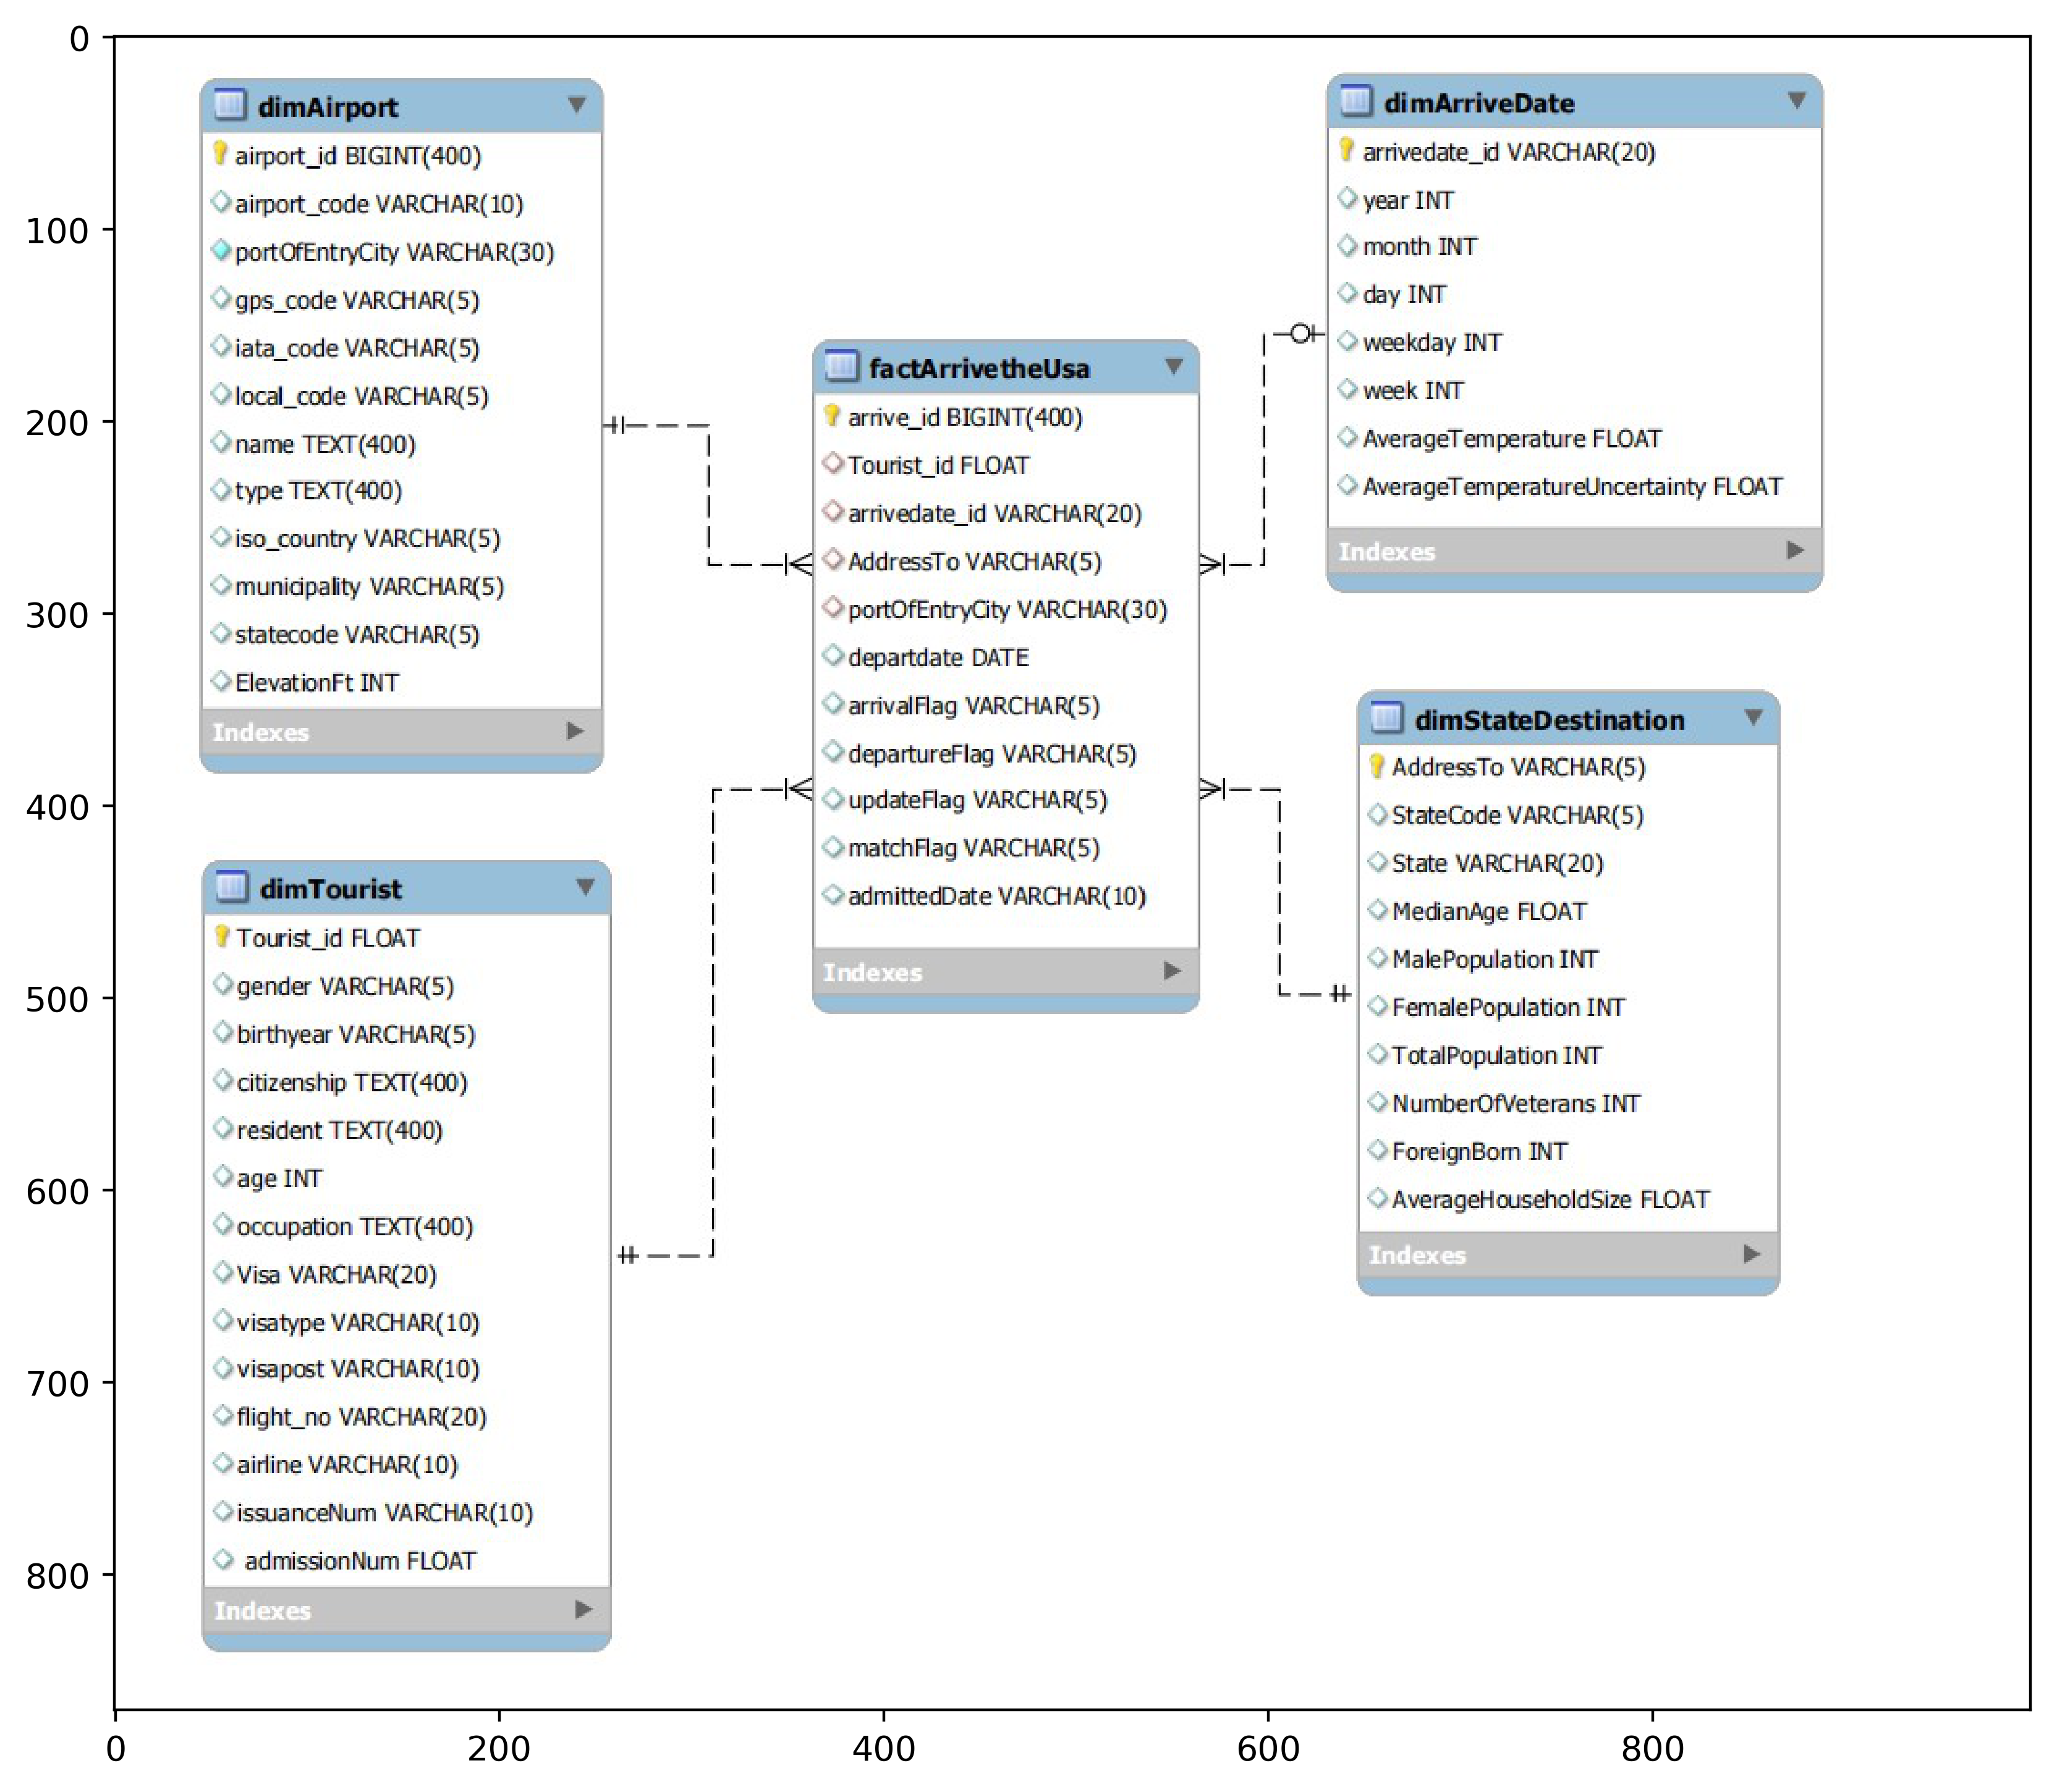

In [348]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
  
# Read Images
img = mpimg.imread('UdacityCapstone.jpg',format ='jpg')
  
# Output Images
plt.figure(figsize=(10,10),dpi =400)
plt.imshow(img)

##### The Data model above shows a fact table of the event, which is arrriving the USA. And also some dimension tables to provide context on the event. The dimension table ought to provide broader context of the events in the fact table. The Tourist dimension table provides information used to identify the tourist. The State destination dimension table provides information on the state to which the tourist will be living in the USA, this could be drilled down to the city if it was provided in the immigration data, but for security purpose it wasn't. The airport dimension table provides information on the airport on arrival, which could be useful for further security checks on the tourist. The arrive date dimension table provides information on the time of arrival and also includes the average temperature on the day of arrival. The fact table provides information which includes arrival flag, departure flag, update flag if the tourist has extended his stay beyond the departure date, and match flag to match his arrival date and departure date. Since this analytical schema is designed for surveillance, the flags are the key metrics. Other purposes can also be achieved with this schema.

### Step 4: Run Pipelines to Model the Data 
#### 4.1 Create the data model


#### In other to build the data pipelines, various scripts has been used seperately.

- The Sql design for the data model has been done in the script named **sql_queries.py**. It contains queries for deleting existing tables if exist and creating new tables in the redshift database for this model development. It also contains queries for copying the parquet files from  S3 storage area to staging tables in redshift, after which, the staged tables are used to populate the analytical schema to provide a single/unique source of truth in the dimension tables and a comprehensive events of arrivals into the country in the fact table.

- The first connection to the database performs the cleaning up of pre-existing tables and creating new tables for developing the schema, this initialization is neccessary at the start of the schema development. The script named  **create_tables.py** implements this first initialization.

- The Extraction of data from S3, transformation and loading to the analytical schema in redshift is implemented in the script named **warehouse.py**.

##### This pipelines requires a redshift cluster to be created first and it's connection credentials provided in the dl.cfg configuration file.

#### 4.2 Data Quality Checks

Data quality test done includes, test for duplicate records in the primary key, test for null values in columns with null constraint, test for completeness of records in the populated analytical tables and test for data validity in rows where some validity are expected. Example of a data validity test is testing between arrive date and departure date, if the departure date is further ahead of the arrive date then the record is valid, otherwise it is invalid. This check could determine if the records are all valid or there exists some invalid records.

#### test for duplicate record in the primary key.
```
test_duplicate = """SELECT {column},count({column}) AS duplicates FROM {table} group By {column}
                            HAVING count({column}) > 1;"
                            
```

#### test for null values in the primary key or any key with a null contraint.
```
test_null = """SELECT {column} FROM {table} WHERE {column} IS NULL;"""

```
#### test for data validity by checking if the departure date is further ahead of the arrival date.
```
test_invalid_record = """SELECT SUM(CASE WHEN CAST(arrivedate_id AS date) > departdate THEN 1 ELSE 0 END)
                            AS invalid_records FROM factArrivetheUsa;"""
```
#### test for completeness of records by comparing values with the expected count.
```
test_record_exist = """SELECT count(*) FROM {table};"""

```


The script **quality_check.py** makes connection to the database and contains methods that queries the database for this quality test result. Another script **test_quality.py** asserts if the quality test result meets the expected result. The **test_quality.py** is a pytest recognized file that contains pytest methods. To run the test, first put in the parameter (name of the column and table or count value) into the argument. 

#### 4.3 Data dictionary 

#### Fact table factArrivetheUsa

```
{'source': 'staging_immigration',
    
'attribute':{'arrive_id':'arrival identification number',
    'Tourist_id':'tourist identification number , referencing the tourist dimension table',
    'arrivedate_id':'Date of arrival',
    'AddressTo': 'fisrt address in the US, referencing the State destination dimension table',
    'portOfEntryCity':'port of customs for arrival, referencing the airport dimension table,
    'departdate':'departure date',
    'arrivalFlag':'Arrival flag, date admitted into US',
    'departureFlag':'Departure flag',
    'updateFlag':'update flag, either overstayed',
    'matchFlag':'match flag, match of arrival and departure',
    'admittedDate':'date Admitted into the US'}
} 
```

#### Dimension table dimStateDestination

```
{
'source':' staging_immigration data joined with staging_demography data on 
                    staging_immigration.StateCode equals staging_demography.i94AddressTo',
    
'attributes':{'AddressTo':'fisrt address in the US',
              'StateCode':'State code of the State in focus',
              'State':'The State in focus',
              'MedianAge':'Median age of the population',
              'MalePopulation':'Number of male population',
              'FemalePopulation':'Number of female population',
              'TotalPopulation':'Number of total population',
              'NumberOfVeterans':'Number of veterans',
              'ForeignBorn':'Number of foreign-born',
              'AverageHouseholdSize':'Average household size'}
}
```

#### Dimension table dimTourist

```
{
'source': 'staging_immigration data',
    
'attributes':{'Tourist_id':' tourist identification number',
              'gender':'gender',
              'birthyear':'year of birth',
              'citizenship':'Country of citizen ',
              'resident':'Country of residence',
              'age':'Age of respondent in years',
              'occupation':'occupation while in the US',
              'Visa':'visa category',
              'visatype':'class of admission',
              'visapost':'Department of State where visa issued',
              'flight_no':'fight number of tourist',
              'airline':'airline used to arrive in the US ',
              'issuanceNum':'passport issuance number',
              'admissionNum':'Admission number'}
}
```

#### Dimension table dimAirport

```
{
'source':'staging_immigration data joined with staging_airport data on 
                staging_immigration.statecode equals staging_airport.i94PortOfEntryCity)',
    
'attributes':{'airport_id':unique identifier for each record,
    'airport_code':'a text identifier for the airport',
    'portOfEntryCity':'port of customs for arrival',
    'gps_code':'the code that an aviation GPS database would normally use for the airport',
    'iata_code':'a three letter IATA code for the airport',
    'local_code':'local country code for the airport if different from gps_code and iata_code',
    'name':'official airport name',
    'type':'the size type of the airport',
    'iso_country':'iso code of the country where airport is located',
    'municipality':'primary municipality where the airport serves, not neccessarily 
                    where it is located',
    'statecode':'State code where airport is located',
    'ElevationFt':'airport elevation in feet'}
}
```

#### Dimension table dimArriveDate

```
{
'source':'staging_immigration data joined with staging_landtemp data on \
                    staging_immigration.arrivedate equals staging_landtemp.date',
    
'attribites':{'arrivedate_id':'Date of arrival',
              'year':'year of arrival',
              'month':'month of arrival',
              'day':'day of arrival',
              'weekday':'week day of arrival',
              'week':' week year of arrival',
              'AverageTemperature':'average temperature recorded',
              'AverageTemperatureUncertainty':'average temperature uncertainty'}
}
```

#### Step 5: Complete Project Write Up

#### The rationale for the choice of tools and technologies for the project.

The implementation considers that the data could be retrieved from any source including a transaction database and stored in a centralized repository which for the purpose of a large data volume the amazon simple storage system (S3) has been selected for data storage. Also, considering that the data could be unstructured and could contain duplicate and null values, and unneccessary attributes, Spark has been considered for achieving a schema-on-read, data transformation and loading/partitioning of data as parquet file to a centralized repository. Having the cleaned up structured data stored in a centralized repository, A redshift cluster has been used considering the scalability and performance on large structured data. The redshift cluster uses a distribution key to improve query performance on join operation performed on the database. Redshift is based on PostgreSQL 8.0.2 and can be integrated with Tableau and other BI tools.

#### How often the data should be updated and why.

This immigration dataset should be updated daily, as the arrival event happens on a daily bases, it is neccessery to get new events immediately after arrival so surveillance could commence. The population demography and airport code dataset can be updated yearly, since the data depends on periodic activities which could be census or future developments. The temperature dataset can be updated daily, as it contains daily temperature measurement.

#### The data was increased by 100x.

If the data is increased by 100 times,Then a cluster of nodes would be preferable to handle the big data processing. This could be achieved by using an EC2 (Elastic Compute Cloud) instance with desirable amount of compute capacity, for the spark datalake. And a Redshift cluster configured with adequate compute and storage capacity. A Redshift Spectrum that isolates the need for large storage capacity in the redshift cluster can be used, since "SELCET INSERT" operations can be performed directly from the S3 storage, eliminating the need to stage the data in a staging table in Redshift.

#### The data populates a dashboard that must be updated on a daily basis by 7am every day.

Updating a dashboard that must be populated at 7am every day, requires that an automated process be implemented to run the ETL scripts few minutes before 7am. A data pipeline with airflow can be used to run the Dag holding this scripts on a daily bases with all required paramaters set.  

#### The database needed to be accessed by 100+ people.

When faced with heavy request, then increasing the number of nodes or the node type is the first consideration to enable a higher throughput (processing power) and slots. This can be achieved by using the Amazon Redshift Elactic resize or Classic resize options for resizing. Proper tuning of the Workload Management (WLM) to provide additional queues to the Workloads and configuring each queue with appropriate slots and memory. The amount of slots in each queue determines it's concurrency (the ability to run queries in parallel) as a query can only run on one slot. Using SQA (Short Query Acceleration) to assign short queries to a different queue will eliminate waiting time when heavy queries run concurrently on thesame queue. By increasing the number of queues and assigning appropriate slot count for each queue will significantly improve the number of request per munite (RPM) and also the response time.